<a href="https://colab.research.google.com/github/orleansmartins/wp-tc-atveco/blob/main/WP_TC_Atv_Eco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparação dos dados

## Instalação dos pacotes

In [59]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import numpy as np
import scipy as sp
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import statistics
import seaborn as sns
import io
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sm
from scipy import stats
import matplotlib.ticker as mtick
sns.set()

## Importação dos dados

In [61]:
from google.colab import files 
uploaded = files.upload()

Saving TC indices 100.xlsx to TC indices 100 (2).xlsx


In [63]:
df100 = pd.read_excel(io.BytesIO(uploaded['TC indices 100.xlsx']))
df100.set_index('Data', inplace=True)
df100.describe()

,IBOV 100,DOLOF 100,ICON 100,IMAT 100,IDA IPCA 100,LFT 100,TC Incert 100,TC Incert Expect 100,TC Incert Indust 100,TC Incert Varejo 100,...,TC Incert,TC Incert Expect,TC Incert Indust,TC Incert Varejo,TC Atv Economica,MKT,HML,SMB,WML,IML
count,2962.000000,3007.000000,2962.000000,2962.000000,2998.000000,3007.000000,3119.000000,3124.000000,3119.000000,3119.000000,...,3119.000000,3124.000000,3119.000000,3119.000000,3112.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,118.666899,179.667250,239.591473,123.253222,226.401656,184.870674,98.673082,63.870190,63.067729,56.171300,...,136.414549,158.366776,136.032676,121.275521,-0.182891,0.000067,0.000057,-0.000193,0.000795,-0.000040
std,37.837350,68.119693,87.766336,71.299852,85.682196,54.537638,73.259364,40.699484,50.265272,54.279509,...,101.280338,100.914779,108.418674,117.191088,1.335417,0.014002,0.007933,0.008652,0.009717,0.008255
min,60.635511,84.059162,100.000000,48.443419,100.000000,100.000000,-2.026054,-1.760832,-7.258001,-7.559413,...,-2.801000,-4.366000,-15.655000,-16.321000,-5.977000,-0.147191,-0.056169,-0.075898,-0.085089,-0.047935
25%,88.402329,115.579293,179.802479,73.452450,154.669091,132.076070,57.410542,39.324705,36.892945,30.107502,...,79.369500,97.506000,79.575500,65.003000,-0.907750,-0.007339,-0.004581,-0.005445,-0.004298,-0.005076
50%,104.638583,176.642016,219.868319,91.329276,212.352700,183.715355,83.809648,56.517618,52.255289,43.292590,...,115.866000,140.136000,112.711000,93.470000,0.077000,0.000178,0.000074,0.000055,0.001030,0.000171
75%,152.634035,219.438510,291.544926,150.384514,303.959766,238.638508,120.399063,77.851067,71.443672,61.116335,...,166.450500,193.032500,154.099000,131.952000,0.529000,0.007758,0.004767,0.004817,0.006313,0.004988
max,211.475210,325.236921,443.750581,349.422940,399.457823,275.316358,536.634623,207.295393,351.592773,367.411754,...,741.892000,513.991000,758.361000,793.253000,3.384000,0.133452,0.048810,0.047994,0.067480,0.038061


In [64]:
from google.colab import files 
uploaded = files.upload()

Saving TC indices Retornos.xlsx to TC indices Retornos (2).xlsx


In [65]:
dfx = pd.read_excel(io.BytesIO(uploaded['TC indices Retornos.xlsx']))
dfx.set_index('Data', inplace=True)
df = dfx/100
df.describe()

,IBOV_var,DOLOF_var,ICON_var,IMAT_var,IDA IPCA_var,LFT_var,TC Incert_var,TC Incert Expect_var,TC Incert Indust_var,TC Incert Varejo_var,TC Atv Economica_var
count,2961.000000,3006.000000,2961.000000,2961.000000,2992.000000,3006.000000,3118.000000,3122.000000,3118.000000,3118.000000,3110.000000
mean,0.000307,0.000370,0.000423,0.000495,0.000466,0.000337,-0.006249,-0.220957,0.011478,0.048226,-0.001478
std,0.015587,0.009013,0.014102,0.018222,0.002736,0.000130,0.624921,12.072277,0.595148,5.632873,0.549815
min,-0.147804,-0.058881,-0.161528,-0.158098,-0.033608,0.000075,-33.971439,-672.716418,-6.886618,-128.692825,-19.000000
25%,-0.008190,-0.004448,-0.006474,-0.009974,-0.000425,0.000246,-0.000846,-0.002038,-0.001774,-0.002913,-0.010741
50%,0.000361,0.000169,0.000748,0.000297,0.000527,0.000347,-0.000107,-0.000420,-0.000583,-0.000761,0.000000
75%,0.009040,0.004961,0.007981,0.011030,0.001542,0.000437,0.000073,-0.000072,-0.000144,-0.000220,0.010753
max,0.139088,0.087881,0.119376,0.138433,0.028665,0.000525,3.051887,12.500000,30.799182,286.122850,10.000000


In [139]:
df_mean = pd.concat([df, df100], axis=1, join='inner')

In [140]:
df_mean = df_mean.dropna()
df_mean.head(5)

,IBOV_var,DOLOF_var,ICON_var,IMAT_var,IDA IPCA_var,LFT_var,TC Incert_var,TC Incert Expect_var,TC Incert Indust_var,TC Incert Varejo_var,...,TC Incert,TC Incert Expect,TC Incert Indust,TC Incert Varejo,TC Atv Economica,MKT,HML,SMB,WML,IML
Data,,,,,,,,,,,,,,,,,,,,,
2010-06-02,0.017820,0.005861,0.013943,0.017567,0.000477,0.000357,0.0,0.0,0.0,0.0,...,138.249,247.951,215.693,215.903,1.778,0.017867,0.003234,-0.003792,0.001717,-0.001455
2010-06-04,-0.020130,0.002124,-0.006875,-0.041185,0.000754,0.000357,0.0,0.0,0.0,0.0,...,138.249,247.951,215.693,215.903,1.691,-0.016328,-0.005554,0.008521,-0.007531,0.008219
2010-06-07,-0.007994,0.012662,0.009231,-0.027589,0.000300,0.000357,0.0,0.0,0.0,0.0,...,138.249,247.951,215.693,215.903,1.536,-0.007311,-0.006228,-0.004023,-0.014950,0.004544
2010-06-08,0.009987,0.001288,0.003049,0.013605,0.000316,0.000357,0.0,0.0,0.0,0.0,...,138.249,247.951,215.693,215.903,1.474,0.007289,0.009537,0.003720,0.008486,-0.005130
2010-06-09,-0.005098,-0.012595,-0.007599,0.003362,0.000191,0.000357,0.0,0.0,0.0,0.0,...,138.249,247.951,215.693,215.903,1.449,-0.004025,-0.002986,0.001483,-0.003742,0.010737


# Formação das Estratégias (L, S e L&S)

## Cálculos de médias e retornos

In [168]:
df_mean['TC AtvEco_SMA30'] = df_mean['TC Atv Economica'].rolling(30).mean()
df_mean['TC AtvEco_SMA60'] = df_mean['TC Atv Economica'].rolling(60).mean()
df_mean['TC AtvEco_SMA90'] = df_mean['TC Atv Economica'].rolling(90).mean()
df_mean['TC AtvEco_SMA180'] = df_mean['TC Atv Economica'].rolling(180).mean()

df_mean['TC Incert_SMA30'] = df_mean['TC Incert'].rolling(30).mean()

In [172]:
df_mean["AtvEco>SMA30"] = np.where((df_mean['TC Atv Economica'].shift(1)) >= (df_mean['TC AtvEco_SMA30'].shift(1)), 1, 0)
df_mean["AtvEco>SMA60"] = np.where((df_mean['TC Atv Economica'].shift(1)) >= (df_mean['TC AtvEco_SMA60'].shift(1)), 1, 0)

df_mean["AtvEco_Alta_SMA30"] = df_mean["TC Atv Economica"] * df_mean["AtvEco>SMA30"]
df_mean["AtvEco_Alta_SMA60"] = df_mean["TC Atv Economica"] * df_mean["AtvEco>SMA60"]

In [173]:
df_mean["AtvEco<SMA30"] = np.where((df_mean['TC Atv Economica'].shift(1)) < (df_mean['TC AtvEco_SMA30'].shift(1)), 1, 0)
df_mean["AtvEco<SMA60"] = np.where((df_mean['TC Atv Economica'].shift(1)) < (df_mean['TC AtvEco_SMA60'].shift(1)), 1, 0)

df_mean["AtvEco_Baixa_SMA30"] = df_mean["TC Atv Economica"] * df_mean["AtvEco<SMA30"]
df_mean["AtvEco_Baixa_SMA60"] = df_mean["TC Atv Economica"] * df_mean["AtvEco<SMA60"]

In [174]:
df_mean['IBOV_AtvEco_Alta'] = df_mean['AtvEco>SMA30'] * (df['IBOV_var'] - 0.0000476) # 0,10% de custo operacional mensal
df_mean['IBOV_AtvEco_Baixa'] = df_mean['AtvEco<SMA30'] * ((df_mean['IBOV_var']*(-1)) + df_mean['LFT_var'] + (df_mean['AtvEco>SMA30'] * df_mean['LFT_var']) - 0.0000476) # 0,10% de custo operacional mensal
df_mean['IBOV_AtvEco_SMA30'] = df_mean['IBOV_AtvEco_Alta'] + df_mean['IBOV_AtvEco_Baixa']

df_mean['IBOV_AtvEco>SMA30_cum'] = (1+df_mean['IBOV_AtvEco_Alta']).cumprod()-1
df_mean['IBOV_AtvEco<SMA30_cum'] = (1+df_mean['IBOV_AtvEco_Baixa']).cumprod()-1
df_mean['IBOV_AtvEco_SMA30_cum'] = (1+df_mean['IBOV_AtvEco_SMA21']).cumprod()-1

In [175]:
df_mean['IBOV_cum'] = (1+df_mean['IBOV_var']).cumprod()-1

## Cálculos das estatísticas das carteiras

In [176]:
# Retorno anualizado

df_mean['IBOV_Ret'] = (1+df_mean['IBOV_var']).rolling(window=252).agg(lambda x : x.prod())-1
df_mean['IBOV_AtvEco_Ret'] = (1+df_mean['IBOV_AtvEco_SMA30']).rolling(window=252).agg(lambda x : x.prod())-1
df_mean['IBOV>AtvEco_Ret'] = (1+df_mean['IBOV_AtvEco_Alta']).rolling(window=252).agg(lambda x : x.prod())-1

print(df_mean[['IBOV_Ret', 'IBOV_AtvEco_Ret', 'IBOV>AtvEco_Ret']].head(255))

            IBOV_Ret  IBOV_AtvEco_Ret  IBOV>AtvEco_Ret
Data                                                  
2010-06-02       NaN              NaN              NaN
2010-06-04       NaN              NaN              NaN
2010-06-07       NaN              NaN              NaN
2010-06-08       NaN              NaN              NaN
2010-06-09       NaN              NaN              NaN
...              ...              ...              ...
2011-06-06       NaN              NaN              NaN
2011-06-07  0.022267         0.039243        -0.009218
2011-06-08  0.001430         0.036152        -0.012165
2011-06-09  0.029072         0.043270        -0.005379
2011-06-10  0.024762         0.030547        -0.017509

[255 rows x 3 columns]


In [177]:
# Volatilidade

df_mean['IBOV_Vol'] = df_mean['IBOV_var'].rolling(window=252).std() * np.sqrt(252)
df_mean['IBOV_AtvEco_Vol'] = df_mean['IBOV_AtvEco_SMA30'].rolling(window=252).std() * np.sqrt(252)
df_mean['IBOV>AtvEco_Vol'] = df_mean['IBOV_AtvEco_Alta'].rolling(window=252).std() * np.sqrt(252)

print(df_mean[['IBOV_Vol', 'IBOV_AtvEco_Vol', 'IBOV>AtvEco_Vol']].tail(5))

            IBOV_Vol  IBOV_AtvEco_Vol  IBOV>AtvEco_Vol
Data                                                  
2022-04-25  0.192446         0.191296         0.087225
2022-04-26  0.193584         0.192582         0.089848
2022-04-27  0.193810         0.192658         0.090184
2022-04-28  0.193629         0.192518         0.089837
2022-04-29  0.194489         0.193561         0.091850


In [178]:
# Tracking Error

df_mean['IBOV_TE'] = df_mean['IBOV_Vol'] * (df_mean['IBOV_Ret'] - df_mean['IBOV_Ret'])
df_mean['IBOV_AtvEco_TE'] = df_mean['IBOV_AtvEco_Vol'] * (df_mean['IBOV_AtvEco_Ret'] - df_mean['IBOV_Ret'])
df_mean['IBOV>AtvEco_TE'] = df_mean['IBOV>AtvEco_Vol'] * (df_mean['IBOV>AtvEco_Ret'] - df_mean['IBOV_Ret'])

print(df_mean[['IBOV_TE', 'IBOV_AtvEco_TE', 'IBOV>AtvEco_TE']].tail(5))

            IBOV_TE  IBOV_AtvEco_TE  IBOV>AtvEco_TE
Data                                               
2022-04-25      0.0        0.096703        0.018874
2022-04-26      0.0        0.095870        0.019145
2022-04-27      0.0        0.097475        0.019531
2022-04-28      0.0        0.096971        0.019369
2022-04-29      0.0        0.095633        0.019425


In [179]:
# Desvio-padrão anualizado

df_mean['IBOV_DP'] = df_mean['IBOV_Ret'].rolling(window=252).std()
df_mean['IBOV_AtvEco_DP'] = df_mean['IBOV_AtvEco_Ret'].rolling(window=252).std()
df_mean['IBOV>AtvEco_DP'] = df_mean['IBOV>AtvEco_Ret'].rolling(window=252).std()

print(df_mean[['IBOV_DP', 'IBOV_AtvEco_DP', 'IBOV>AtvEco_DP']].tail(5))

             IBOV_DP  IBOV_AtvEco_DP  IBOV>AtvEco_DP
Data                                                
2022-04-25  0.201230        0.110539        0.108259
2022-04-26  0.200297        0.110611        0.107342
2022-04-27  0.199483        0.110740        0.106415
2022-04-28  0.198386        0.110859        0.105350
2022-04-29  0.197159        0.110923        0.104327


In [180]:
# Sharpe Ratio

df_mean['LFT_Ret'] = (1+df_mean['LFT_var']).rolling(window=252).agg(lambda x : x.prod())-1

df_mean['IBOV_SR'] = (df_mean['IBOV_Ret'] - df_mean['LFT_Ret']) / df_mean['IBOV_DP']
df_mean['IBOV_AtvEco_SR'] = (df_mean['IBOV_AtvEco_Ret'] - df_mean['LFT_Ret']) / df_mean['IBOV_AtvEco_DP']
df_mean['IBOV>AtvEco_SR'] = (df_mean['IBOV>AtvEco_Ret'] - df_mean['LFT_Ret']) / df_mean['IBOV>AtvEco_DP']

print(df_mean[['IBOV_SR', 'IBOV_AtvEco_SR', 'IBOV>AtvEco_SR']].tail(5))

             IBOV_SR  IBOV_AtvEco_SR  IBOV>AtvEco_SR
Data                                                
2022-04-25 -0.765222        3.180122        0.576388
2022-04-26 -0.840176        2.979142        0.417383
2022-04-27 -0.771521        3.179016        0.588889
2022-04-28 -0.798137        3.115292        0.543591
2022-04-29 -0.893299        2.866371        0.338967


## Separação dos DF

In [183]:
df_clean = df_mean[['IBOV', 'IBOV_var', 'IBOV_cum', 'TC Incert', 'TC Incert_SMA30', 'TC Atv Economica', 'TC AtvEco_SMA30', 'TC AtvEco_SMA60', 'TC AtvEco_SMA90', 'TC AtvEco_SMA180', 'AtvEco<SMA30', 'AtvEco>SMA30', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta', 'IBOV_AtvEco_SMA30', 'IBOV_AtvEco<SMA30_cum', 'IBOV_AtvEco>SMA30_cum', 'IBOV_AtvEco_SMA30_cum', 'MKT', 'HML', 'SMB', 'WML', 'IML']]

In [184]:
df_clean.isnull().sum()

IBOV                       0
IBOV_var                   0
IBOV_cum                   0
TC Incert                  0
TC Incert_SMA30           29
TC Atv Economica           0
TC AtvEco_SMA30           29
TC AtvEco_SMA60           59
TC AtvEco_SMA90           89
TC AtvEco_SMA180         179
AtvEco<SMA30               0
AtvEco>SMA30               0
IBOV_AtvEco_Baixa          0
IBOV_AtvEco_Alta           0
IBOV_AtvEco_SMA30          0
IBOV_AtvEco<SMA30_cum      0
IBOV_AtvEco>SMA30_cum      0
IBOV_AtvEco_SMA30_cum      0
MKT                        0
HML                        0
SMB                        0
WML                        0
IML                        0
dtype: int64

In [185]:
df_clean = df_clean.dropna()

df_clean[['IBOV_var', 'TC Atv Economica', 'TC AtvEco_SMA30', 'AtvEco<SMA30', 'AtvEco>SMA30', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta', 'IBOV_AtvEco_SMA30', 'IBOV_AtvEco<SMA30_cum', 'IBOV_AtvEco>SMA30_cum', 'IBOV_AtvEco_SMA30_cum', 'IBOV_cum']].describe()

,IBOV_var,TC Atv Economica,TC AtvEco_SMA30,AtvEco<SMA30,AtvEco>SMA30,IBOV_AtvEco_Baixa,IBOV_AtvEco_Alta,IBOV_AtvEco_SMA30,IBOV_AtvEco<SMA30_cum,IBOV_AtvEco>SMA30_cum,IBOV_AtvEco_SMA30_cum,IBOV_cum
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,0.000340,-0.244096,-0.244425,0.467660,0.532340,0.000437,0.000615,0.001052,0.900529,1.196321,0.743550,0.311834
std,0.015751,1.341066,1.307278,0.499044,0.499044,0.011999,0.010192,0.015726,0.399977,1.072365,0.752086,0.477952
min,-0.147804,-5.977000,-5.253167,0.000000,0.000000,-0.138975,-0.088040,-0.138975,-0.052081,-0.046165,-0.276268,-0.340111
25%,-0.008191,-1.059000,-1.193133,0.000000,0.000000,0.000000,-0.000013,-0.007600,0.574924,0.256454,-0.089872,-0.089683
50%,0.000347,-0.002000,-0.015133,0.000000,1.000000,0.000000,0.000000,0.000869,0.957986,0.933038,0.868595,0.089153
75%,0.009069,0.445000,0.452192,1.000000,1.000000,0.000000,0.001739,0.009639,1.220578,1.696208,1.229351,0.761857
max,0.139088,3.384000,3.314333,1.000000,1.000000,0.147917,0.050951,0.147917,1.787587,4.010265,2.910182,1.408545


In [186]:
df_clean[['IBOV_var', 'TC Atv Economica', 'TC AtvEco_SMA30', 'AtvEco<SMA30', 'AtvEco>SMA30', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta', 'IBOV_AtvEco_SMA30', 'IBOV_AtvEco<SMA30_cum', 'IBOV_AtvEco>SMA30_cum', 'IBOV_AtvEco_SMA30_cum', 'IBOV_cum']].tail(30)

,IBOV_var,TC Atv Economica,TC AtvEco_SMA30,AtvEco<SMA30,AtvEco>SMA30,IBOV_AtvEco_Baixa,IBOV_AtvEco_Alta,IBOV_AtvEco_SMA30,IBOV_AtvEco<SMA30_cum,IBOV_AtvEco>SMA30_cum,IBOV_AtvEco_SMA30_cum,IBOV_cum
Data,,,,,,,,,,,,
2022-03-17,0.017675,0.579,0.562800,0,1,-0.000000,0.017627,0.017627,1.513649,3.734204,2.589757,1.082560
2022-03-18,0.019762,0.590,0.562933,0,1,-0.000000,0.019714,0.019714,1.513649,3.827535,2.660526,1.123715
2022-03-21,0.007316,0.590,0.562867,0,1,-0.000000,0.007268,0.007268,1.513649,3.862623,2.687133,1.139252
2022-03-22,0.009624,0.582,0.562467,0,1,-0.000000,0.009577,0.009577,1.513649,3.909191,2.722443,1.159841
2022-03-23,0.001577,0.570,0.561567,0,1,-0.000000,0.001529,0.001529,1.513649,3.916698,2.728135,1.163247
2022-03-24,0.013584,0.558,0.560300,0,1,-0.000000,0.013537,0.013537,1.513649,3.983254,2.778602,1.192633
2022-03-25,0.000237,0.545,0.558300,1,0,0.000151,0.000000,0.000151,1.514028,3.983254,2.779317,1.193152
2022-03-28,-0.002883,0.522,0.555367,1,0,0.003271,-0.000000,0.003271,1.522253,3.983254,2.791681,1.186829
2022-03-29,0.010750,0.513,0.552700,1,0,-0.010362,0.000000,-0.010362,1.496118,3.983254,2.752393,1.210336


In [187]:
ols = ['IBOV_var', 'IBOV_cum', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta', 'IBOV_AtvEco_SMA30', 'IBOV_AtvEco<SMA30_cum', 'IBOV_AtvEco>SMA30_cum', 'IBOV_AtvEco_SMA30_cum', 'MKT', 'HML', 'SMB', 'WML', 'IML']
ols

['IBOV_var',
 'IBOV_cum',
 'IBOV_AtvEco_Baixa',
 'IBOV_AtvEco_Alta',
 'IBOV_AtvEco_SMA30',
 'IBOV_AtvEco<SMA30_cum',
 'IBOV_AtvEco>SMA30_cum',
 'IBOV_AtvEco_SMA30_cum',
 'MKT',
 'HML',
 'SMB',
 'WML',
 'IML']

In [188]:
df_10y = df_clean['2012-01-01':'2021-12-31'].copy()
df_12a19 = df_clean['2012-01-01':'2019-12-31'].copy()
df_crise = df_clean['2020-01-01':'2021-12-21'].copy()

df_12 = df_clean['2012-01-01':'2012-12-31'].copy()
df_13 = df_clean['2013-01-01':'2013-12-31'].copy()
df_14 = df_clean['2014-01-01':'2014-12-31'].copy()
df_15 = df_clean['2015-01-01':'2015-12-31'].copy()
df_16 = df_clean['2016-01-01':'2016-12-31'].copy()
df_17 = df_clean['2017-01-01':'2017-12-31'].copy()
df_18 = df_clean['2018-01-01':'2018-12-31'].copy()
df_19 = df_clean['2019-01-01':'2019-12-31'].copy()
df_20 = df_clean['2020-01-01':'2020-12-31'].copy()
df_21 = df_clean['2021-01-01':'2021-12-31'].copy()

In [189]:
df_2w = df_10y.copy()

def percentile_capping_ols(df_10y, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df_10y[col], limits=(from_low_end, from_high_end), inplace=True)

In [190]:
percentile_capping_ols(df_2w, ols, 0.025, 0.025)
df_2w.describe()

,IBOV,IBOV_var,IBOV_cum,TC Incert,TC Incert_SMA30,TC Atv Economica,TC AtvEco_SMA30,TC AtvEco_SMA60,TC AtvEco_SMA90,TC AtvEco_SMA180,...,IBOV_AtvEco_Alta,IBOV_AtvEco_SMA30,IBOV_AtvEco<SMA30_cum,IBOV_AtvEco>SMA30_cum,IBOV_AtvEco_SMA30_cum,MKT,HML,SMB,WML,IML
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,...,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,73621.775203,0.000479,0.314805,146.854513,145.827559,-0.307648,-0.311046,-0.316642,-0.323556,-0.356904,...,0.000622,0.000962,0.946167,1.214979,0.752543,0.000252,0.000101,-0.000185,0.000783,-0.000064
std,24067.870964,0.013347,0.470928,105.256225,100.969039,1.403536,1.366203,1.316880,1.268887,1.136387,...,0.008907,0.013415,0.337410,0.981865,0.679656,0.011769,0.007426,0.007851,0.008471,0.007637
min,37497.000000,-0.029368,-0.233300,15.582000,19.097100,-5.977000,-5.253167,-4.055017,-2.808244,-2.388850,...,-0.021415,-0.027390,0.268899,0.158304,-0.237756,-0.026467,-0.015835,-0.017540,-0.019409,-0.016445
25%,53865.750000,-0.008161,-0.093386,83.222000,84.945942,-1.382500,-1.363908,-1.466975,-1.436331,-1.169837,...,-0.000494,-0.007619,0.667151,0.283206,-0.085382,-0.007264,-0.004692,-0.005505,-0.004306,-0.005205
50%,63920.500000,0.000378,0.134376,121.614500,124.428017,-0.091000,-0.110383,-0.145167,-0.142906,-0.186967,...,0.000000,0.000667,1.020516,1.127180,0.904677,0.000243,0.000070,-0.000015,0.000905,0.000096
75%,95469.860000,0.009085,0.758297,169.779500,164.465375,0.437250,0.445350,0.418646,0.390031,0.280036,...,0.002006,0.009609,1.218793,1.684601,1.222942,0.007843,0.004952,0.004831,0.006263,0.004971
max,130776.270000,0.028985,1.254018,741.892000,679.023100,3.384000,3.314333,3.000850,2.689767,2.320167,...,0.023846,0.031869,1.473254,3.348689,2.008717,0.025659,0.017076,0.017671,0.018554,0.016568


In [191]:
df_10w = df_2w['2012-01-01':'2021-12-31'].copy()
df_12a19w = df_2w['2012-01-01':'2019-12-31'].copy()
df_crise_w = df_2w['2020-01-01':'2021-12-21'].copy()


df_12w = df_2w['2012-01-01':'2012-12-31'].copy()
df_13w = df_2w['2013-01-01':'2013-12-31'].copy()
df_14w = df_2w['2014-01-01':'2014-12-31'].copy()
df_15w = df_2w['2015-01-01':'2015-12-31'].copy()
df_16w = df_2w['2016-01-01':'2016-12-31'].copy()
df_17w = df_2w['2017-01-01':'2017-12-31'].copy()
df_18w = df_2w['2018-01-01':'2018-12-31'].copy()
df_19w = df_2w['2019-01-01':'2019-12-31'].copy()
df_20w = df_2w['2020-01-01':'2020-12-31'].copy()
df_21w = df_2w['2021-01-01':'2021-12-31'].copy()

#Análises

In [192]:
df_m_index = df_10y[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].resample('M').agg(lambda x:(x+1).prod()-1)
df_m_index.describe()

,IBOV_var,IBOV_AtvEco_Baixa,IBOV_AtvEco_Alta,IBOV_AtvEco_SMA30
count,120.000000,120.000000,120.000000,120.000000
mean,0.008218,0.007033,0.012570,0.019766
std,0.064547,0.051522,0.039504,0.066894
min,-0.299043,-0.111128,-0.099215,-0.113106
25%,-0.032249,-0.015093,-0.006859,-0.023177
50%,0.007070,0.000000,0.002064,0.010198
75%,0.048228,0.022458,0.028128,0.055652
max,0.159026,0.287367,0.121700,0.317630


In [193]:
df_y_index = df_10y[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].resample('Y').agg(lambda x:(x+1).prod()-1)
df_y_index.describe()

,IBOV_var,IBOV_AtvEco_Baixa,IBOV_AtvEco_Alta,IBOV_AtvEco_SMA30
count,10.000000,10.000000,10.000000,10.000000
mean,0.091945,0.080302,0.156755,0.245947
std,0.203673,0.142800,0.118433,0.179911
min,-0.154958,-0.106200,-0.006630,-0.085546
25%,-0.077949,-0.063991,0.076191,0.157996
50%,0.059981,0.136345,0.154064,0.244718
75%,0.239008,0.180667,0.203869,0.343386
max,0.453998,0.294906,0.348602,0.540365


## Médias anuais

In [194]:
df_12[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.000447
IBOV_AtvEco_Baixa    0.000533
IBOV_AtvEco_Alta     0.000826
IBOV_AtvEco_SMA30    0.001359
dtype: float64

In [195]:
df_13[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var            -0.000595
IBOV_AtvEco_Baixa    0.000759
IBOV_AtvEco_Alta     0.000007
IBOV_AtvEco_SMA30    0.000766
dtype: float64

In [196]:
df_14[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.000058
IBOV_AtvEco_Baixa    0.000628
IBOV_AtvEco_Alta     0.000442
IBOV_AtvEco_SMA30    0.001071
dtype: float64

In [197]:
df_15[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var            -0.000318
IBOV_AtvEco_Baixa    0.001113
IBOV_AtvEco_Alta     0.000510
IBOV_AtvEco_SMA30    0.001624
dtype: float64

In [93]:
df_16[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA21']].mean()

IBOV_var             0.001694
IBOV_AtvEco_Baixa   -0.000264
IBOV_AtvEco_Alta     0.001247
IBOV_AtvEco_SMA21    0.000983
dtype: float64

In [198]:
df_17[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.001040
IBOV_AtvEco_Baixa   -0.000152
IBOV_AtvEco_Alta     0.000791
IBOV_AtvEco_SMA30    0.000638
dtype: float64

In [199]:
df_18[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.000669
IBOV_AtvEco_Baixa   -0.000411
IBOV_AtvEco_Alta     0.000144
IBOV_AtvEco_SMA30   -0.000267
dtype: float64

In [200]:
df_19[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.001171
IBOV_AtvEco_Baixa   -0.000335
IBOV_AtvEco_Alta     0.000740
IBOV_AtvEco_SMA30    0.000405
dtype: float64

In [201]:
df_20[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.000517
IBOV_AtvEco_Baixa    0.000835
IBOV_AtvEco_Alta     0.001289
IBOV_AtvEco_SMA30    0.002123
dtype: float64

In [202]:
df_21[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var            -0.000427
IBOV_AtvEco_Baixa    0.000817
IBOV_AtvEco_Alta     0.000274
IBOV_AtvEco_SMA30    0.001091
dtype: float64

In [203]:
df_10y[['IBOV_var', 'IBOV_AtvEco_Baixa', 'IBOV_AtvEco_Alta',	'IBOV_AtvEco_SMA30']].mean()

IBOV_var             0.000422
IBOV_AtvEco_Baixa    0.000354
IBOV_AtvEco_Alta     0.000626
IBOV_AtvEco_SMA30    0.000980
dtype: float64

## Estatísticas das carteiras

In [204]:
df_mean[['IBOV_Ret', 'IBOV_AtvEco_Ret', 'IBOV>AtvEco_Ret']]['2012-01-01':'2021-12-31'].mean()

IBOV_Ret           0.099382
IBOV_AtvEco_Ret    0.267223
IBOV>AtvEco_Ret    0.165139
dtype: float64

In [205]:
df_mean[['IBOV_Ret', 'IBOV_AtvEco_Ret', 'IBOV>AtvEco_Ret']]['2012-01-01':'2019-12-31'].mean()

IBOV_Ret           0.099352
IBOV_AtvEco_Ret    0.229189
IBOV>AtvEco_Ret    0.135904
dtype: float64

In [206]:
df_mean[['IBOV_DP', 'IBOV_AtvEco_DP', 'IBOV>AtvEco_DP']]['2012-01-01':'2021-12-31'].mean()

IBOV_DP           0.122508
IBOV_AtvEco_DP    0.166084
IBOV>AtvEco_DP    0.083728
dtype: float64

In [207]:
df_mean[['IBOV_DP', 'IBOV_AtvEco_DP', 'IBOV>AtvEco_DP']]['2012-01-01':'2019-12-31'].mean()

IBOV_DP           0.106878
IBOV_AtvEco_DP    0.155562
IBOV>AtvEco_DP    0.080525
dtype: float64

In [208]:
df_mean[['IBOV_Vol', 'IBOV_AtvEco_Vol', 'IBOV>AtvEco_Vol']]['2012-01-01':'2021-12-31'].mean()

IBOV_Vol           0.245602
IBOV_AtvEco_Vol    0.245220
IBOV>AtvEco_Vol    0.165161
dtype: float64

In [209]:
df_mean[['IBOV_Vol', 'IBOV_AtvEco_Vol', 'IBOV>AtvEco_Vol']]['2012-01-01':'2019-12-31'].mean()

IBOV_Vol           0.225576
IBOV_AtvEco_Vol    0.225256
IBOV>AtvEco_Vol    0.164777
dtype: float64

In [210]:
df_mean[['IBOV_TE', 'IBOV_AtvEco_TE', 'IBOV>AtvEco_TE']]['2012-01-01':'2021-12-31'].mean()

IBOV_TE           0.000000
IBOV_AtvEco_TE    0.054467
IBOV>AtvEco_TE    0.011821
dtype: float64

In [211]:
df_mean[['IBOV_TE', 'IBOV_AtvEco_TE', 'IBOV>AtvEco_TE']]['2012-01-01':'2019-12-31'].mean()

IBOV_TE           0.000000
IBOV_AtvEco_TE    0.034374
IBOV>AtvEco_TE    0.006686
dtype: float64

In [212]:
df_mean[['IBOV_SR', 'IBOV_AtvEco_SR', 'IBOV>AtvEco_SR']]['2012-01-01':'2021-12-31'].mean()

IBOV_SR          -0.052088
IBOV_AtvEco_SR    0.706402
IBOV>AtvEco_SR    0.659777
dtype: float64

In [213]:
df_mean[['IBOV_SR', 'IBOV_AtvEco_SR', 'IBOV>AtvEco_SR']]['2012-01-01':'2019-12-31'].mean()

IBOV_SR          -0.162868
IBOV_AtvEco_SR    0.411962
IBOV>AtvEco_SR    0.120820
dtype: float64

In [217]:
y = df_10w['IBOV_var']
x1 = df_10w[['IBOV_AtvEco_SMA30']]
x2 = df_10w[['IBOV_AtvEco_Alta']]

x1 = sm.add_constant(x1)
x2 = sm.add_constant(x2)

result1 = sm.OLS(y, x1, missing='drop').fit()
result2 = sm.OLS(y, x2, missing='drop').fit()

print(result1.summary())
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               IBOV_var   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1551
Date:                Tue, 14 Jun 2022   Prob (F-statistic):              0.694
Time:                        18:49:35   Log-Likelihood:                 7122.8
No. Observations:                2458   AIC:                        -1.424e+04
Df Residuals:                    2456   BIC:                        -1.423e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Associação 

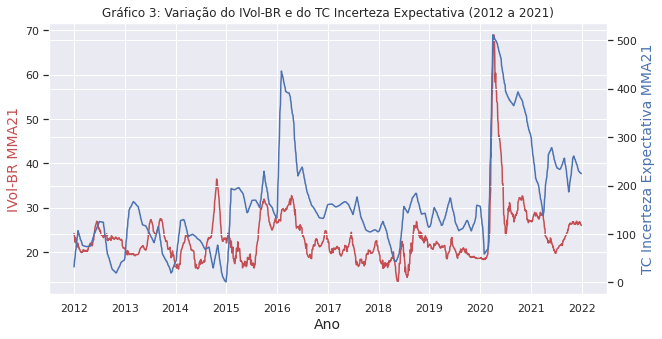

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_10y['IVOL_BR_SMA21'], color ='r')
ax.set_xlabel("Ano", fontsize=14)
ax.set_ylabel("IVol-BR MMA21", color ='r', fontsize=14)
ax.set_title("Gráfico 3: Variação do IVol-BR e do TC Incerteza Expectativa (2012 a 2021)")

ax2=ax.twinx()
ax2.plot(df_10y['TC Expect_SMA21'], color ='b')
ax2.set_ylabel("TC Incerteza Expectativa MMA21", color ='b', fontsize=14)

plt.show()

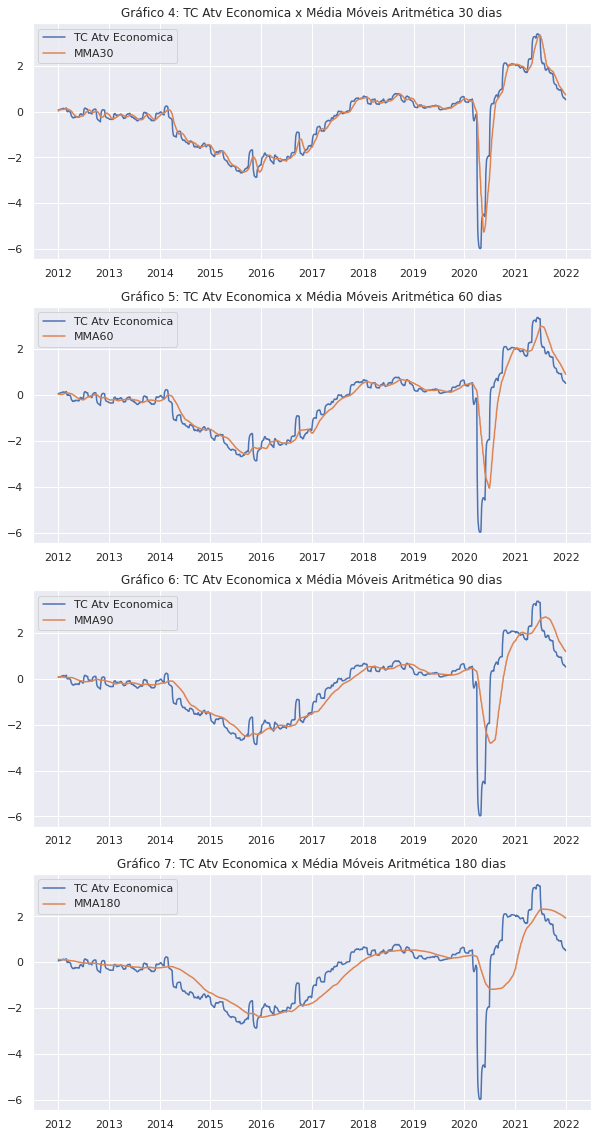

In [218]:
fig, ax = plt.subplots(4,1, figsize=(10,20))

ax[0].plot(df_10y['TC Atv Economica'], label = "TC Atv Economica")
ax[0].plot(df_10y['TC AtvEco_SMA30'], label = "MMA30")
ax[0].set_title("Gráfico 4: TC Atv Economica x Média Móveis Aritmética 30 dias")
ax[0].legend()

ax[1].plot(df_10y['TC Atv Economica'], label = "TC Atv Economica")
ax[1].plot(df_10y['TC AtvEco_SMA60'], label = "MMA60")
ax[1].set_title("Gráfico 5: TC Atv Economica x Média Móveis Aritmética 60 dias")
ax[1].legend()

ax[2].plot(df_10y['TC Atv Economica'], label = "TC Atv Economica")
ax[2].plot(df_10y['TC AtvEco_SMA90'], label = "MMA90")
ax[2].set_title("Gráfico 6: TC Atv Economica x Média Móveis Aritmética 90 dias")
ax[2].legend()

ax[3].plot(df_10y['TC Atv Economica'], label = "TC Atv Economica")
ax[3].plot(df_10y['TC AtvEco_SMA180'], label = "MMA180")
ax[3].set_title("Gráfico 7: TC Atv Economica x Média Móveis Aritmética 180 dias")
ax[3].legend()

sns.set()

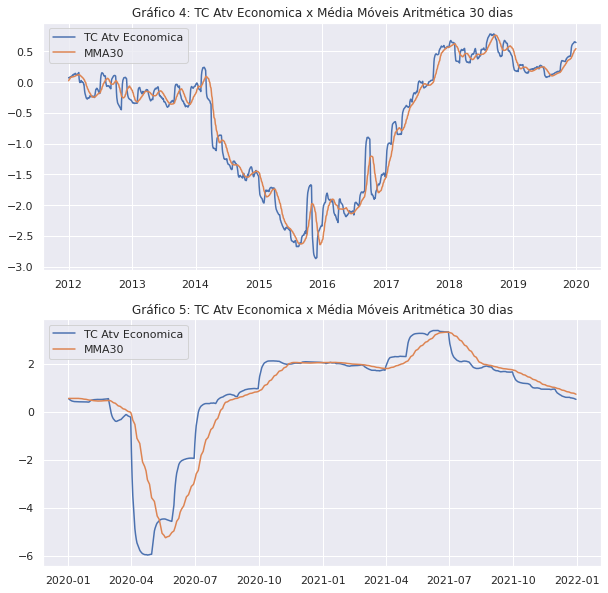

In [219]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(df_10y['TC Atv Economica']['2012-01-01':'2019-12-31'], label = "TC Atv Economica")
ax[0].plot(df_10y['TC AtvEco_SMA30']['2012-01-01':'2019-12-31'], label = "MMA30")
ax[0].set_title("Gráfico 4: TC Atv Economica x Média Móveis Aritmética 30 dias")
ax[0].legend()

ax[1].plot(df_10y['TC Atv Economica']['2020-01-01':'2021-12-31'], label = "TC Atv Economica")
ax[1].plot(df_10y['TC AtvEco_SMA30']['2020-01-01':'2021-12-31'], label = "MMA30")
ax[1].set_title("Gráfico 5: TC Atv Economica x Média Móveis Aritmética 30 dias")
ax[1].legend()

sns.set()

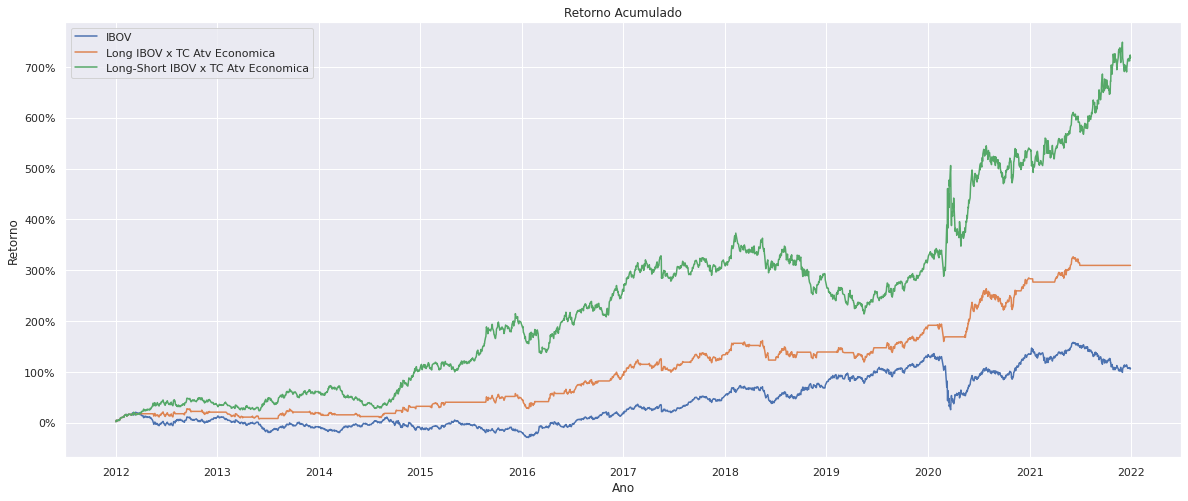

In [220]:
fig, axes = plt.subplots(figsize=(20,8))

plt.plot((1+df_10y['IBOV_var']).cumprod()-1, label = 'IBOV')
plt.plot((1+df_10y['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC Atv Economica')
plt.plot((1+df_10y['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC Atv Economica')

plt.title('Retorno Acumulado')
plt.xlabel('Ano')
plt.ylabel('Retorno')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(True)

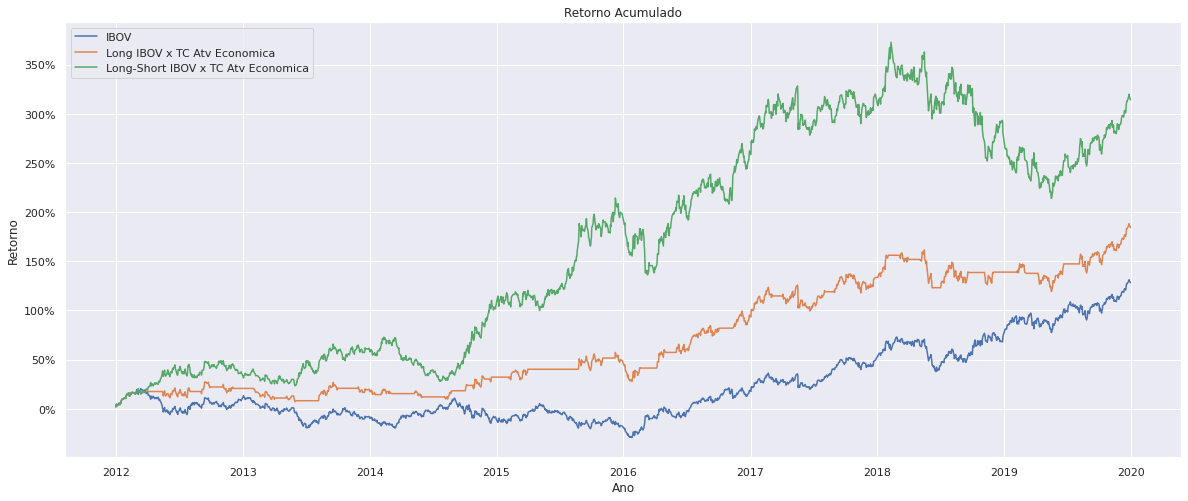

In [221]:
fig, axes = plt.subplots(figsize=(20,8))

plt.plot((1+df_12a19['IBOV_var']).cumprod()-1, label = 'IBOV')
plt.plot((1+df_12a19['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC Atv Economica')
plt.plot((1+df_12a19['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC Atv Economica')

plt.title('Retorno Acumulado')
plt.xlabel('Ano')
plt.ylabel('Retorno')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(True)

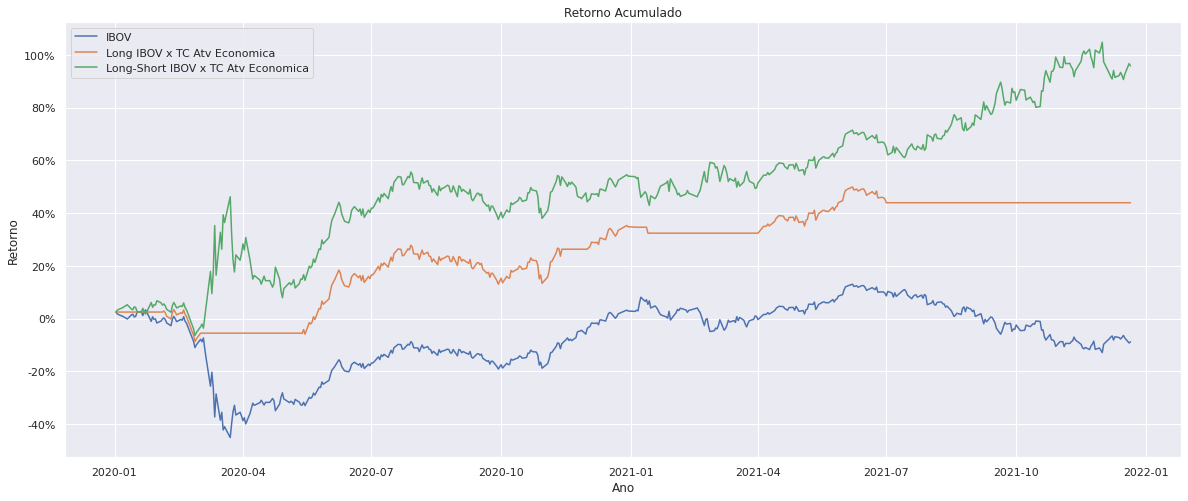

In [222]:
fig, axes = plt.subplots(figsize=(20,8))

plt.plot((1+df_crise['IBOV_var']).cumprod()-1, label = 'IBOV')
plt.plot((1+df_crise['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC Atv Economica')
plt.plot((1+df_crise['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC Atv Economica')

plt.title('Retorno Acumulado')
plt.xlabel('Ano')
plt.ylabel('Retorno')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(True)

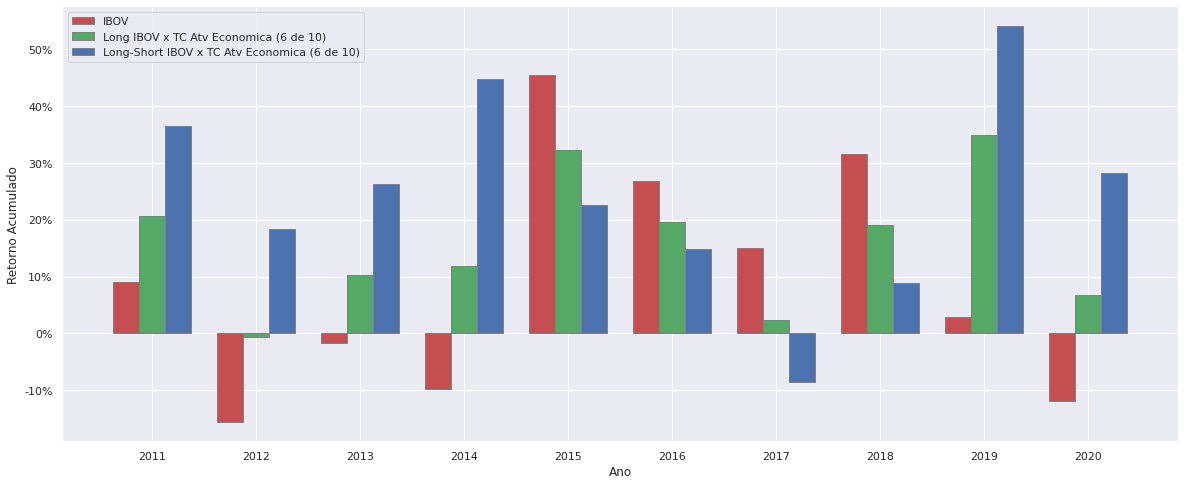

In [223]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))

# Set position of bar on X axis
br1 = np.arange(len(df_y_index['IBOV_var']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, df_y_index['IBOV_var'], color ='r', width = barWidth, edgecolor ='grey', label ='IBOV')
plt.bar(br2, df_y_index['IBOV_AtvEco_Alta'], color ='g', width = barWidth,	edgecolor ='grey', label ='Long IBOV x TC Atv Economica (6 de 10)')
plt.bar(br3, df_y_index['IBOV_AtvEco_SMA30'], color ='b', width = barWidth,	edgecolor ='grey', label ='Long-Short IBOV x TC Atv Economica (6 de 10)')

# Adding Xticks
plt.xlabel('Ano')
plt.ylabel('Retorno Acumulado')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xticks([r + barWidth for r in range(len(df_y_index['IBOV_var']))],
        ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

plt.legend(loc='upper left')
plt.show()
sns.set()

In [224]:
list(df_10y)

['IBOV',
 'IBOV_var',
 'IBOV_cum',
 'TC Incert',
 'TC Incert_SMA30',
 'TC Atv Economica',
 'TC AtvEco_SMA30',
 'TC AtvEco_SMA60',
 'TC AtvEco_SMA90',
 'TC AtvEco_SMA180',
 'AtvEco<SMA30',
 'AtvEco>SMA30',
 'IBOV_AtvEco_Baixa',
 'IBOV_AtvEco_Alta',
 'IBOV_AtvEco_SMA30',
 'IBOV_AtvEco<SMA30_cum',
 'IBOV_AtvEco>SMA30_cum',
 'IBOV_AtvEco_SMA30_cum',
 'MKT',
 'HML',
 'SMB',
 'WML',
 'IML']

In [225]:
df_10yre = df_10y.copy()
df_10yre = df_10yre.rename(columns = {"IBOV": "Ibovespa", "IBOV_var": "Retorno IBOV", "TC Incert": "TC-IG", "TC Incert_SMA30": "TC-IG MMA30", "TC Atv Economica": "TC-AE", "TC AtvEco_SMA30": "TC-AE MMA30"})

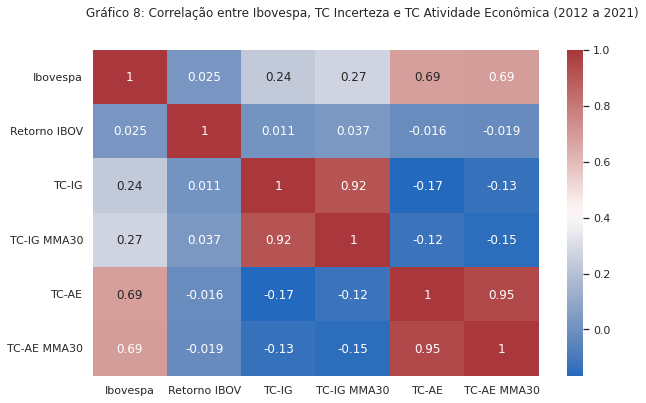

In [226]:
fig, axes = plt.subplots(figsize=(10,6))

fig.suptitle("Gráfico 8: Correlação entre Ibovespa, TC Incerteza e TC Atividade Econômica (2012 a 2021)", size=12)

correl2 = pd.DataFrame(df_10yre,columns=['Ibovespa', 'Retorno IBOV', 'TC-IG', 'TC-IG MMA30', 'TC-AE', 'TC-AE MMA30'])

corrMatrix = correl2.corr()
sns.heatmap(corrMatrix, annot=True, cmap='vlag')
plt.show()

## Drawdown

In [227]:
# Compute the wealth index by starting with 100 dollars

df_10y['IBOV_wealth_index'] = 100 * (1+df_10y['IBOV_var']).cumprod() # The starting value won't matter with drawdowns
df_10y['IBOV_previous_peaks'] = df_10y['IBOV_wealth_index'].cummax() # Compute the previous peaks 
df_10y['IBOV_Drawdown'] = (df_10y['IBOV_wealth_index'] - df_10y['IBOV_previous_peaks'])/df_10y['IBOV_previous_peaks'] # Calculate the drawdown in percentage

print(df_10y[['IBOV_wealth_index', 'IBOV_previous_peaks', 'IBOV_Drawdown']].head())

            IBOV_wealth_index  IBOV_previous_peaks  IBOV_Drawdown
Data                                                             
2012-01-02         101.894140           101.894140       0.000000
2012-01-03         104.422596           104.422596       0.000000
2012-01-04         104.598795           104.598795       0.000000
2012-01-05         103.157487           104.598795      -0.013779
2012-01-06         103.252634           104.598795      -0.012870


In [228]:
# Compute the wealth index by starting with 100 dollars

df_10y['AtvEco_wealth_index'] = 100 * (1+df_10y['IBOV_AtvEco_SMA30']).cumprod() # The starting value won't matter with drawdowns
df_10y['AtvEco_previous_peaks'] = df_10y['AtvEco_wealth_index'].cummax() # Compute the previous peaks 
df_10y['AtvEco_Drawdown'] = (df_10y['AtvEco_wealth_index'] - df_10y['AtvEco_previous_peaks'])/df_10y['AtvEco_previous_peaks'] # Calculate the drawdown in percentage

print(df_10y[['AtvEco_wealth_index', 'AtvEco_previous_peaks', 'AtvEco_Drawdown']].head())

            AtvEco_wealth_index  AtvEco_previous_peaks  AtvEco_Drawdown
Data                                                                   
2012-01-02           101.889380             101.889380         0.000000
2012-01-03           104.412868             104.412868         0.000000
2012-01-04           104.584080             104.584080         0.000000
2012-01-05           103.137997             104.584080        -0.013827
2012-01-06           103.228217             104.584080        -0.012964


In [229]:
# Compute the wealth index by starting with 100 dollars

df_10y['Alta_wealth_index'] = 100 * (1+df_10y['IBOV_AtvEco_Alta']).cumprod() # The starting value won't matter with drawdowns
df_10y['Alta_previous_peaks'] = df_10y['Alta_wealth_index'].cummax() # Compute the previous peaks 
df_10y['Alta_Drawdown'] = (df_10y['Alta_wealth_index'] - df_10y['Alta_previous_peaks'])/df_10y['Alta_previous_peaks'] # Calculate the drawdown in percentage

print(df_10y[['Alta_wealth_index', 'Alta_previous_peaks', 'Alta_Drawdown']].head())

            Alta_wealth_index  Alta_previous_peaks  Alta_Drawdown
Data                                                             
2012-01-02         101.889380           101.889380       0.000000
2012-01-03         104.412868           104.412868       0.000000
2012-01-04         104.584080           104.584080       0.000000
2012-01-05         103.137997           104.584080      -0.013827
2012-01-06         103.228217           104.584080      -0.012964


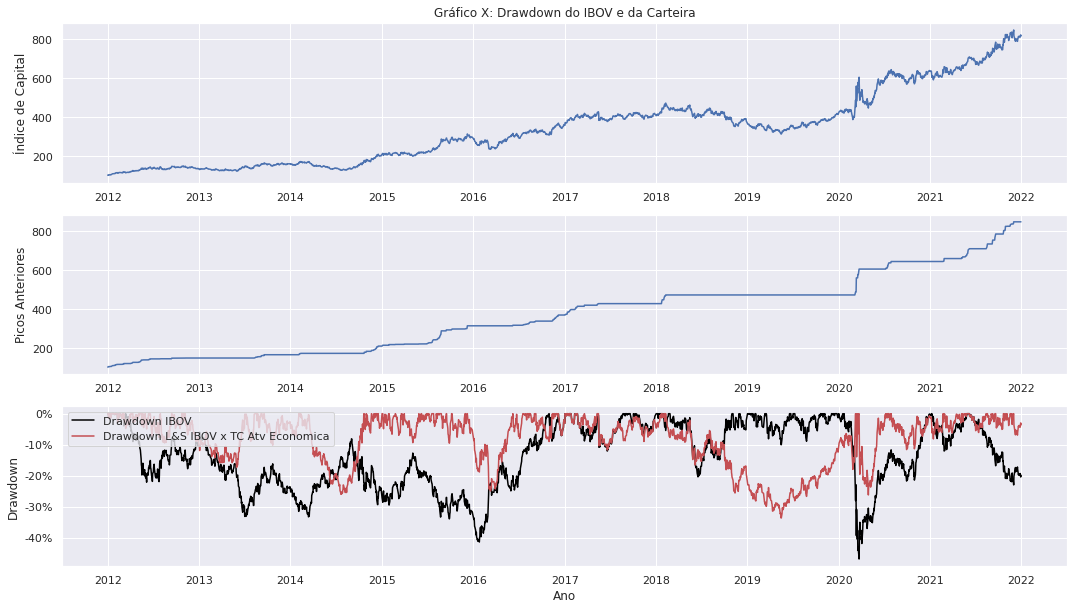

In [230]:
fig, ax = plt.subplots(3,1, figsize=(18,10))

ax[0].plot(df_10y['AtvEco_wealth_index']) # Plot the wealth index over time 
ax[0].set_ylabel('Índice de Capital')
ax[0].set_title("Gráfico X: Drawdown do IBOV e da Carteira")

ax[1].plot(df_10y['AtvEco_previous_peaks']) # Plot the previous peaks
ax[1].set_ylabel('Picos Anteriores')

ax[2].plot(df_10y['IBOV_Drawdown'], label = "Drawdown IBOV", color = "black") # Plot the previous peaks
ax[2].plot(df_10y['AtvEco_Drawdown'], label = "Drawdown L&S IBOV x TC Atv Economica", color = "r") # Plot the previous peaks
ax[2].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[2].set_ylabel('Drawdown')
ax[2].set_xlabel('Ano')
ax[2].legend(loc='upper left')

sns.set()

In [231]:
# Get the worst drawdown and the date it happened 
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']].mean())
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']].min())
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']].idxmin()) 

IBOV_Drawdown     -0.133395
AtvEco_Drawdown   -0.081857
Alta_Drawdown     -0.049399
dtype: float64
IBOV_Drawdown     -0.468160
AtvEco_Drawdown   -0.336017
Alta_Drawdown     -0.187887
dtype: float64
IBOV_Drawdown     2020-03-23
AtvEco_Drawdown   2019-05-17
Alta_Drawdown     2016-01-26
dtype: datetime64[ns]


In [232]:
# Get the worst drawdown and the date it happened 
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']]['2012-01-01':'2019-12-31'].mean())
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']]['2012-01-01':'2019-12-31'].min())
print(df_10y[['IBOV_Drawdown', 'AtvEco_Drawdown', 'Alta_Drawdown']]['2012-01-01':'2019-12-31'].idxmin()) 

IBOV_Drawdown     -0.133913
AtvEco_Drawdown   -0.089197
Alta_Drawdown     -0.053318
dtype: float64
IBOV_Drawdown     -0.413379
AtvEco_Drawdown   -0.336017
Alta_Drawdown     -0.187887
dtype: float64
IBOV_Drawdown     2016-01-26
AtvEco_Drawdown   2019-05-17
Alta_Drawdown     2016-01-26
dtype: datetime64[ns]


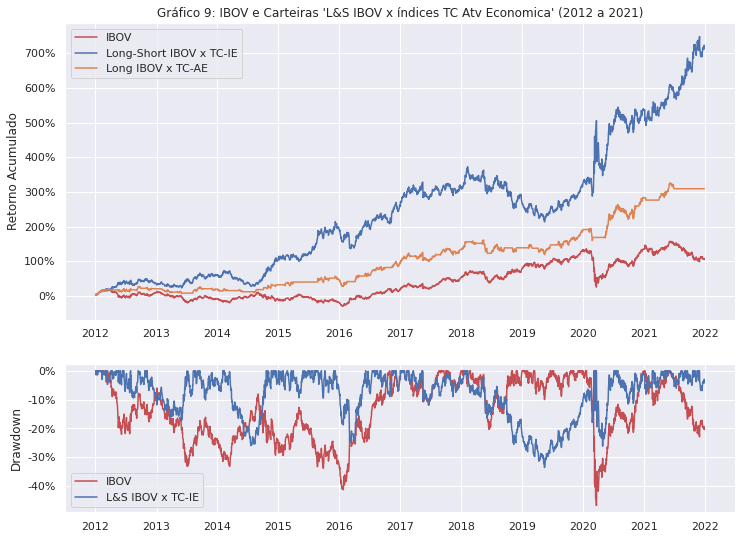

In [234]:
fig, ax = plt.subplots(2,1, figsize=(12,9), gridspec_kw={'height_ratios': [2, 1]})

ax[0].plot((1+df_10y['IBOV_var']).cumprod()-1, label = 'IBOV', color = 'r')
ax[0].plot((1+df_10y['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC-IE')
ax[0].plot((1+df_10y['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC-AE')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[0].set_title("Gráfico 9: IBOV e Carteiras 'L&S IBOV x índices TC Atv Economica' (2012 a 2021)")
ax[0].set_ylabel('Retorno Acumulado')
ax[0].legend(loc='upper left')

ax[1].plot(df_10y['IBOV_Drawdown'], label = "IBOV", color = "r") 
ax[1].plot(df_10y['AtvEco_Drawdown'], label = "L&S IBOV x TC-IE") 
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_ylabel('Drawdown')
ax[1].legend(loc='lower left')

sns.set()

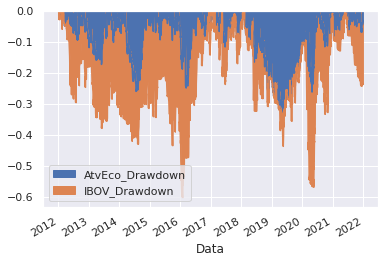

In [235]:
ax = df_10y[['AtvEco_Drawdown', 'IBOV_Drawdown']].plot.area()

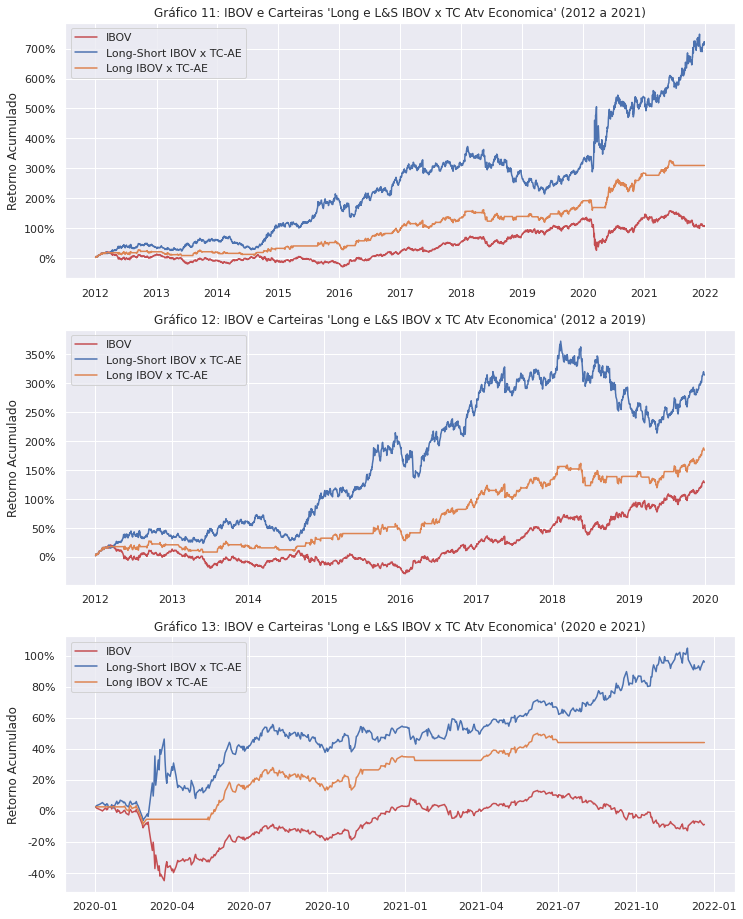

In [236]:
fig, ax = plt.subplots(3,1, figsize=(12,16))

ax[0].plot((1+df_10y['IBOV_var']).cumprod()-1, label = 'IBOV', color = 'r')
ax[0].plot((1+df_10y['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC-AE')
ax[0].plot((1+df_10y['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC-AE')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[0].set_title("Gráfico 11: IBOV e Carteiras 'Long e L&S IBOV x TC Atv Economica' (2012 a 2021)")
ax[0].set_ylabel('Retorno Acumulado')
ax[0].legend(loc='upper left')

ax[1].plot((1+df_12a19['IBOV_var']).cumprod()-1, label = 'IBOV', color = 'r')
ax[1].plot((1+df_12a19['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC-AE')
ax[1].plot((1+df_12a19['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC-AE')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_title("Gráfico 12: IBOV e Carteiras 'Long e L&S IBOV x TC Atv Economica' (2012 a 2019)")
ax[1].set_ylabel('Retorno Acumulado')
ax[1].legend(loc='upper left')

ax[2].plot((1+df_crise['IBOV_var']).cumprod()-1, label = 'IBOV', color = 'r')
ax[2].plot((1+df_crise['IBOV_AtvEco_SMA30']).cumprod()-1, label = 'Long-Short IBOV x TC-AE')
ax[2].plot((1+df_crise['IBOV_AtvEco_Alta']).cumprod()-1, label = 'Long IBOV x TC-AE')
ax[2].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[2].set_title("Gráfico 13: IBOV e Carteiras 'Long e L&S IBOV x TC Atv Economica' (2020 e 2021)")
ax[2].set_ylabel('Retorno Acumulado')
ax[2].legend(loc='upper left')

sns.set()

##OLS para WP

In [237]:
# defining the variables
y = df_10w['IBOV_var']
x1 = df_10w['TC Atv Economica_var']
x2 = df_10w['AtvEco>SMA30']
x3 = df_10w[['TC Atv Economica_var', 'AtvEco>SMA21', 'TC>AtvEco_var']]

# adding the constant term
x1 = sm.add_constant(x1)
x2 = sm.add_constant(x2)
x3 = sm.add_constant(x3)

# performing the regression
result1 = sm.OLS(y, x1, missing='drop').fit()
result2 = sm.OLS(y, x2, missing='drop').fit()
result3 = sm.OLS(y, x3, missing='drop').fit()

# printing the summary table
print(result1.summary())
print("≡"*90 + "\n")
print(result2.summary())
print("≡"*90 + "\n")
print(result3.summary())

KeyError: ignored

In [ ]:
from scipy import stats
mu, std = stats.norm.fit(result3.resid)
mu, std

(1.4363341002066712e-17, 0.013328832611775643)

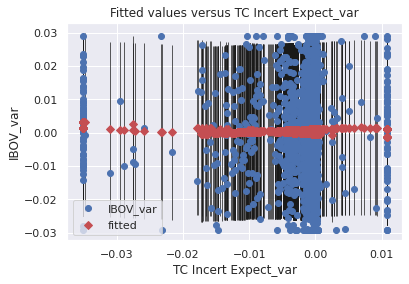

In [ ]:
sm.graphics.plot_fit(result3,1);

In [ ]:
y = df_10w['IBOV_var']
x = df_10w[['TC Incert Expect_var', 'Incert Expect<SMA21', 'TC<Expect_var']]
x = sm.add_constant(x)

result4 = sm.OLS(y, x, missing='drop').fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:               IBOV_var   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.843
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.137
Time:                        13:58:03   Log-Likelihood:                 7125.5
No. Observations:                2458   AIC:                        -1.424e+04
Df Residuals:                    2454   BIC:                        -1.422e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
y = df_10w['IBOV_var']
x = df_10w[['TC Incert Expect_var', 'Incert Expect<SMA21', 'TC<Expect_var']]

x = df_10w.iloc[:, :-1].values
y = df_10w.iloc[:, 1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_train)

print(regressor.intercept_)
print(regressor.coef_)

df_10w_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_10w_pred

9.381384558082573e-15
[ 5.35860065e-15  1.00000000e+00  2.66964901e-16 -3.44453444e-16
  2.18661298e-15 -1.42073256e-15  2.59771472e-15 -2.47247634e-15
  3.15407450e-16  5.62760626e-14  5.40473076e-15 -2.67082090e-16
  2.96655553e-16  1.38788485e-16 -2.36803468e-16  3.20010262e-14
 -5.09083003e-16 -1.51973703e-14  1.92163993e-15  5.23452809e-16
 -1.20151285e-15 -5.32560107e-15  8.11416906e-16  7.35129731e-16
 -4.20393971e-15]


,Actual,Predicted
0,-0.126721,-0.008729
1,0.593777,0.984617
2,-0.165823,0.996876
3,-0.060552,0.324629
4,-0.098088,-0.233300
...,...,...
1224,-0.127628,0.917407
1225,0.459026,0.261106
1226,0.436478,0.726348
1227,-0.191904,0.772388


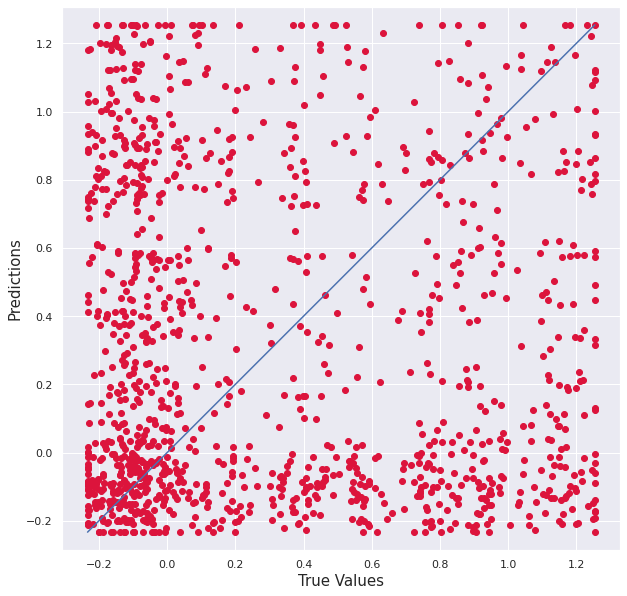

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df_10w_pred['Actual'], df_10w_pred['Predicted'], c='crimson')

p1 = max(max(df_10w_pred['Predicted']), max(df_10w_pred['Actual']))
p2 = min(min(df_10w_pred['Predicted']), min(df_10w_pred['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

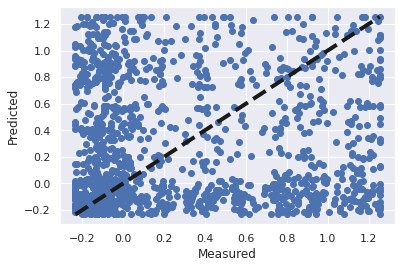

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df_10w_pred['Actual'], df_10w_pred['Predicted'])
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# defining the variables
y = df_12a19w['IBOV_var']
x1 = df_12a19w['TC Incert Expect_var']
x2 = df_12a19w['Incert Expect<SMA21']
x3 = df_12a19w[['TC Incert Expect_var', 'Incert Expect<SMA21', 'TC<Expect_var']]

# adding the constant term
x1 = sm.add_constant(x1)
x2 = sm.add_constant(x2)
x3 = sm.add_constant(x3)

# performing the regression
result5 = sm.OLS(y, x1, missing='drop').fit()
result6 = sm.OLS(y, x2, missing='drop').fit()
result7 = sm.OLS(y, x3, missing='drop').fit()

# printing the summary table
print(result5.summary())
print("≡"*90 + "\n")
print(result6.summary())
print("≡"*90 + "\n")
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:               IBOV_var   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07314
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.787
Time:                        13:58:20   Log-Likelihood:                 5737.7
No. Observations:                1962   AIC:                        -1.147e+04
Df Residuals:                    1960   BIC:                        -1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_10w[['IBOV_var', 'IBOV_Expect_Baixa', 'IBOV_Expect_SMA21']].describe()

,IBOV_var,IBOV_Expect_Baixa,IBOV_Expect_SMA21
count,2458.000000,2458.000000,2458.000000
mean,0.000479,0.000664,0.000824
std,0.013347,0.010003,0.013330
min,-0.029368,-0.023987,-0.027962
25%,-0.008161,-0.002583,-0.007866
50%,0.000378,0.000236,0.000653
75%,0.009085,0.003964,0.009489
max,0.028985,0.025849,0.030183


In [ ]:
y = df_10w['IBOV_var']
x = df_10w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x = sm.add_constant(x)

result8 = sm.OLS(y, x, missing='drop').fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:               IBOV_var   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        13:58:34   Log-Likelihood:                 11580.
No. Observations:                2458   AIC:                        -2.315e+04
Df Residuals:                    2452   BIC:                        -2.311e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   4.42e-05      6.030      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



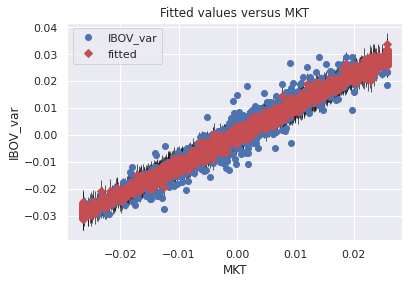

In [ ]:
from scipy import stats
mu, std = stats.norm.fit(result8.resid)
mu, std

sm.graphics.plot_fit(result8,1);

In [ ]:
y = df_10w['IBOV_Expect_Baixa']
x = df_10w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x = sm.add_constant(x)

result9 = sm.OLS(y, x, missing='drop').fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_Baixa   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     742.7
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        13:58:54   Log-Likelihood:                 8964.7
No. Observations:                2458   AIC:                        -1.792e+04
Df Residuals:                    2452   BIC:                        -1.788e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      4.659      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



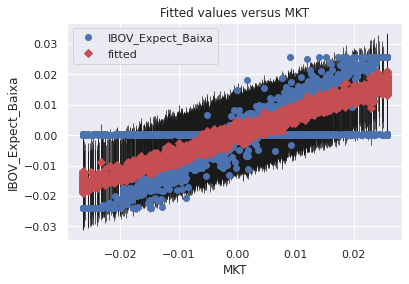

In [ ]:
from scipy import stats
mu, std = stats.norm.fit(result8.resid)
mu, std

sm.graphics.plot_fit(result9,1);

In [ ]:
y = df_10w['IBOV_Expect_Baixa']
x = df_10w[['MKT', 'HML', 'SMB', 'WML', 'IML']]

x = df_10w.iloc[:, :-1].values
y = df_10w.iloc[:, 1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_train)

print(regressor.intercept_)
print(regressor.coef_)

df_10w_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_10w_pred

-4.4297898682543746e-14
[ 3.71982730e-13  1.00000000e+00 -1.29094169e-16  2.35982564e-16
 -4.49880315e-15  3.33718855e-15 -1.72682004e-13  1.40604366e-13
 -3.23421228e-14  1.12350586e-13 -5.40747434e-13  1.76773007e-16
  7.67198829e-17  2.31456123e-16 -3.00845062e-16  1.14875987e-14
 -1.59785400e-14  6.99608557e-16  4.87457297e-16  4.29018800e-15
 -6.67868538e-16  1.38452617e-16  1.00898565e-15 -1.15636938e-15
 -5.27084886e-16]


,Actual,Predicted
0,-0.069238,-0.233300
1,0.037474,-0.232844
2,0.005377,0.438733
3,1.196462,-0.138470
4,0.757278,-0.144712
...,...,...
1224,0.413594,-0.067501
1225,0.595131,1.182050
1226,-0.204163,0.543309
1227,-0.009100,1.197130


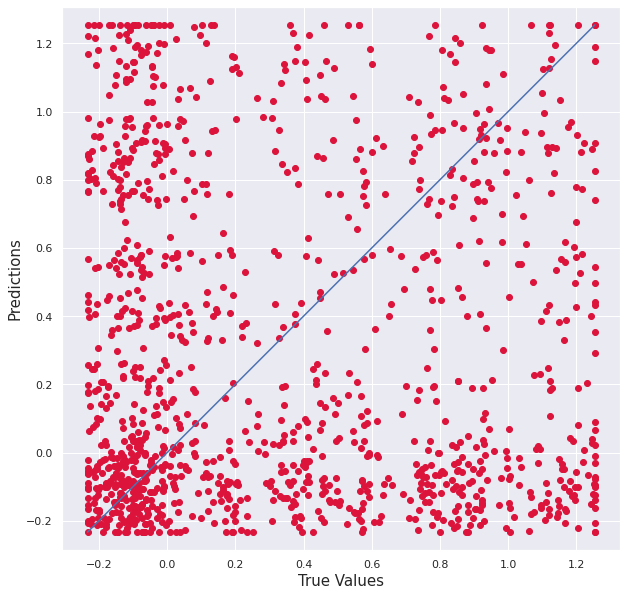

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df_10w_pred['Actual'], df_10w_pred['Predicted'], c='crimson')

p1 = max(max(df_10w_pred['Predicted']), max(df_10w_pred['Actual']))
p2 = min(min(df_10w_pred['Predicted']), min(df_10w_pred['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
y = df_10w['IBOV_Expect_SMA21']
x1 = df_10w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     34.64
Date:                Tue, 31 May 2022   Prob (F-statistic):           2.55e-34
Time:                        13:59:26   Log-Likelihood:                 7209.6
No. Observations:                2458   AIC:                        -1.441e+04
Df Residuals:                    2452   BIC:                        -1.437e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      3.412      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
y = df_12a19w['IBOV_var']
x = df_12a19w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x = sm.add_constant(x)

result8 = sm.OLS(y, x, missing='drop').fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:               IBOV_var   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.206e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        15:06:16   Log-Likelihood:                 9132.5
No. Observations:                1962   AIC:                        -1.825e+04
Df Residuals:                    1956   BIC:                        -1.822e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   5.24e-05      5.895      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
y = df_12a19w['IBOV_Expect_Baixa']
x1 = df_12a19w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_Baixa   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     544.6
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        13:59:38   Log-Likelihood:                 7175.1
No. Observations:                1962   AIC:                        -1.434e+04
Df Residuals:                    1956   BIC:                        -1.430e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      3.864      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
y = df_12a19w['IBOV_Expect_SMA21']
x1 = df_12a19w[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.57
Date:                Tue, 31 May 2022   Prob (F-statistic):           4.51e-20
Time:                        13:59:47   Log-Likelihood:                 5788.5
No. Observations:                1962   AIC:                        -1.157e+04
Df Residuals:                    1956   BIC:                        -1.153e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.693      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



## Anual

In [ ]:
df_12['IBOV_Expect_SMA21_cum'] = (1+df_12['IBOV_Expect_SMA21']).cumprod()-1
df_12['IBOV_Expect<SMA21_cum'] = (1+df_12['IBOV_Expect_Baixa']).cumprod()-1
df_12['IBOV_Expect>SMA21_cum'] = (1+df_12['IBOV_Expect_Alta']).cumprod()-1
df_12['IBOV_cum'] = (1+df_12['IBOV_var']).cumprod()-1

df_12[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2012-12-28,0.201706,0.076303,0.293386,0.090805


In [ ]:
y = df_12['IBOV_Expect_SMA21']
x1 = df_12[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.217
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0534
Time:                        14:24:52   Log-Likelihood:                 712.01
No. Observations:                 245   AIC:                            -1412.
Df Residuals:                     239   BIC:                            -1391.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      1.844      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



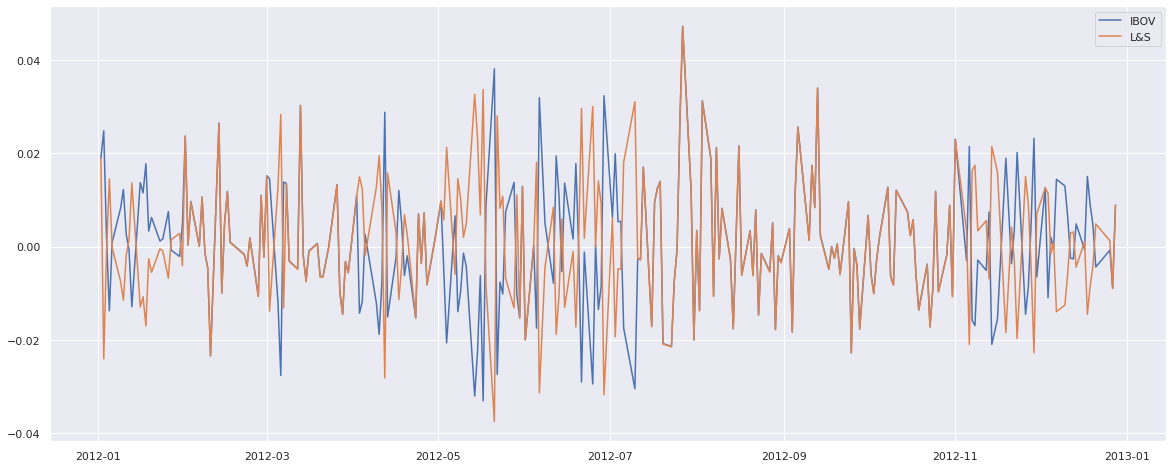

In [ ]:
fig, axes = plt.subplots(figsize=(20,8))

plt.plot(df_12['IBOV_var'], label = 'IBOV')
plt.plot(df_12['IBOV_Expect_SMA21'], label = 'L&S')

plt.legend()

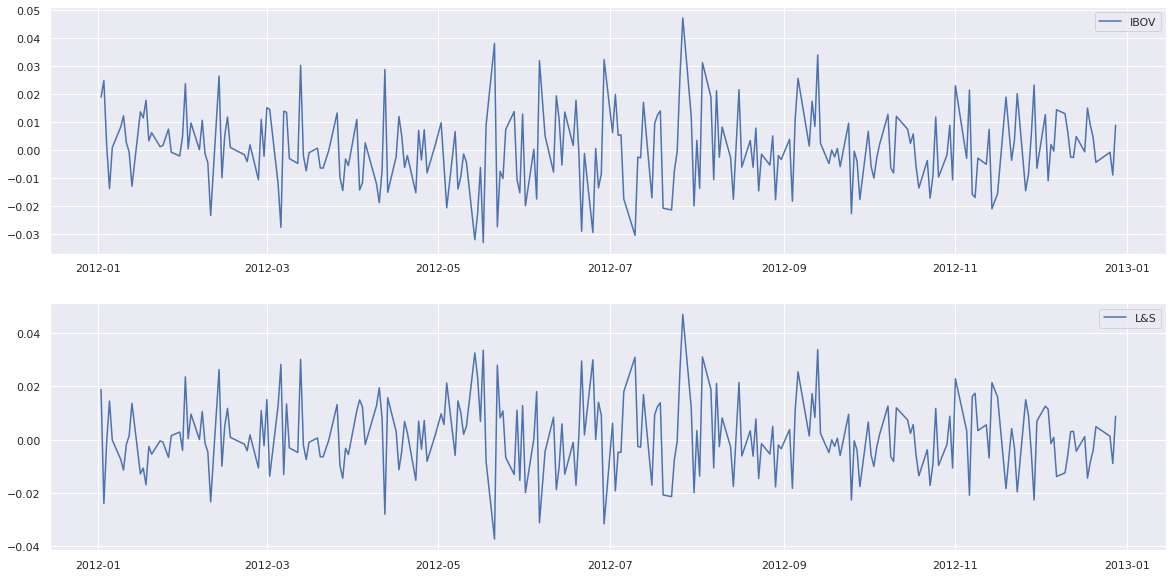

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

ax[0].plot(df_12['IBOV_var'], label = "IBOV")
ax[0].legend()

ax[1].plot(df_12['IBOV_Expect_SMA21'], label = "L&S")
ax[1].legend()

sns.set()

In [ ]:
df_13['IBOV_Expect_SMA21_cum'] = (1+df_13['IBOV_Expect_SMA21']).cumprod()-1
df_13['IBOV_Expect<SMA21_cum'] = (1+df_13['IBOV_Expect_Baixa']).cumprod()-1
df_13['IBOV_Expect>SMA21_cum'] = (1+df_13['IBOV_Expect_Alta']).cumprod()-1
df_13['IBOV_cum'] = (1+df_13['IBOV_var']).cumprod()-1

df_13[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2013-12-30,-0.070159,0.09092,0.014358,-0.154958


In [ ]:
y = df_13['IBOV_Expect_SMA21']
x1 = df_13[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     25.37
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.49e-20
Time:                        14:25:11   Log-Likelihood:                 778.30
No. Observations:                 248   AIC:                            -1545.
Df Residuals:                     242   BIC:                            -1524.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.164      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_14['IBOV_Expect_SMA21_cum'] = (1+df_14['IBOV_Expect_SMA21']).cumprod()-1
df_14['IBOV_Expect<SMA21_cum'] = (1+df_14['IBOV_Expect_Baixa']).cumprod()-1
df_14['IBOV_Expect>SMA21_cum'] = (1+df_14['IBOV_Expect_Alta']).cumprod()-1
df_14['IBOV_cum'] = (1+df_14['IBOV_var']).cumprod()-1

df_14[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2014-12-30,0.027683,0.018483,0.046674,-0.016632


In [ ]:
y = df_14['IBOV_Expect_SMA21']
x1 = df_14[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.207
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0543
Time:                        14:25:20   Log-Likelihood:                 678.25
No. Observations:                 247   AIC:                            -1344.
Df Residuals:                     241   BIC:                            -1323.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.569      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_15['IBOV_Expect_SMA21_cum'] = (1+df_15['IBOV_Expect_SMA21']).cumprod()-1
df_15['IBOV_Expect<SMA21_cum'] = (1+df_15['IBOV_Expect_Baixa']).cumprod()-1
df_15['IBOV_Expect>SMA21_cum'] = (1+df_15['IBOV_Expect_Alta']).cumprod()-1
df_15['IBOV_cum'] = (1+df_15['IBOV_var']).cumprod()-1

df_15[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2015-12-30,0.026519,0.118708,0.148317,-0.098387


In [ ]:
y = df_15['IBOV_Expect_SMA21']
x1 = df_15[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     7.855
Date:                Tue, 31 May 2022   Prob (F-statistic):           7.28e-07
Time:                        14:25:34   Log-Likelihood:                 703.37
No. Observations:                 244   AIC:                            -1395.
Df Residuals:                     238   BIC:                            -1374.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.969      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_16['IBOV_Expect_SMA21_cum'] = (1+df_16['IBOV_Expect_SMA21']).cumprod()-1
df_16['IBOV_Expect<SMA21_cum'] = (1+df_16['IBOV_Expect_Baixa']).cumprod()-1
df_16['IBOV_Expect>SMA21_cum'] = (1+df_16['IBOV_Expect_Alta']).cumprod()-1
df_16['IBOV_cum'] = (1+df_16['IBOV_var']).cumprod()-1

df_16[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2016-12-29,0.481087,0.004109,0.487193,0.453998


In [ ]:
y = df_16['IBOV_Expect_SMA21']
x1 = df_16[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     20.01
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.37e-16
Time:                        14:25:38   Log-Likelihood:                 692.97
No. Observations:                 239   AIC:                            -1374.
Df Residuals:                     233   BIC:                            -1353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.072      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_17['IBOV_Expect_SMA21_cum'] = (1+df_17['IBOV_Expect_SMA21']).cumprod()-1
df_17['IBOV_Expect<SMA21_cum'] = (1+df_17['IBOV_Expect_Baixa']).cumprod()-1
df_17['IBOV_Expect>SMA21_cum'] = (1+df_17['IBOV_Expect_Alta']).cumprod()-1
df_17['IBOV_cum'] = (1+df_17['IBOV_var']).cumprod()-1

df_17[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2017-12-28,0.183073,-0.079994,0.08848,0.268569


In [ ]:
y = df_17['IBOV_Expect_SMA21']
x1 = df_17[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.368
Date:                Tue, 31 May 2022   Prob (F-statistic):           0.000798
Time:                        14:25:41   Log-Likelihood:                 749.69
No. Observations:                 246   AIC:                            -1487.
Df Residuals:                     240   BIC:                            -1466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.864e-05      0.001     -0.064      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_18['IBOV_Expect_SMA21_cum'] = (1+df_18['IBOV_Expect_SMA21']).cumprod()-1
df_18['IBOV_Expect<SMA21_cum'] = (1+df_18['IBOV_Expect_Baixa']).cumprod()-1
df_18['IBOV_Expect>SMA21_cum'] = (1+df_18['IBOV_Expect_Alta']).cumprod()-1
df_18['IBOV_cum'] = (1+df_18['IBOV_var']).cumprod()-1

df_18[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2018-12-28,0.216101,0.031627,0.254568,0.150326


In [ ]:
y = df_18['IBOV_Expect_SMA21']
x1 = df_18[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.805
Date:                Tue, 31 May 2022   Prob (F-statistic):            0.00247
Time:                        14:25:45   Log-Likelihood:                 708.49
No. Observations:                 245   AIC:                            -1405.
Df Residuals:                     239   BIC:                            -1384.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.826      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_19['IBOV_Expect_SMA21_cum'] = (1+df_19['IBOV_Expect_SMA21']).cumprod()-1
df_19['IBOV_Expect<SMA21_cum'] = (1+df_19['IBOV_Expect_Baixa']).cumprod()-1
df_19['IBOV_Expect>SMA21_cum'] = (1+df_19['IBOV_Expect_Alta']).cumprod()-1
df_19['IBOV_cum'] = (1+df_19['IBOV_var']).cumprod()-1

df_19[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2019-12-30,0.144152,-0.143556,-0.020066,0.315837


In [ ]:
y = df_19['IBOV_Expect_SMA21']
x1 = df_19[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5056
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.772
Time:                        14:25:55   Log-Likelihood:                 760.12
No. Observations:                 248   AIC:                            -1508.
Df Residuals:                     242   BIC:                            -1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.179      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_20['IBOV_Expect_SMA21_cum'] = (1+df_20['IBOV_Expect_SMA21']).cumprod()-1
df_20['IBOV_Expect<SMA21_cum'] = (1+df_20['IBOV_Expect_Baixa']).cumprod()-1
df_20['IBOV_Expect>SMA21_cum'] = (1+df_20['IBOV_Expect_Alta']).cumprod()-1
df_20['IBOV_cum'] = (1+df_20['IBOV_var']).cumprod()-1

df_20[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2020-12-30,0.705278,0.435466,1.447846,0.029157


In [ ]:
y = df_20['IBOV_Expect_SMA21']
x1 = df_20[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     20.34
Date:                Tue, 31 May 2022   Prob (F-statistic):           6.06e-17
Time:                        14:26:01   Log-Likelihood:                 582.66
No. Observations:                 249   AIC:                            -1153.
Df Residuals:                     243   BIC:                            -1132.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.001      3.056      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_21['IBOV_Expect_SMA21_cum'] = (1+df_21['IBOV_Expect_SMA21']).cumprod()-1
df_21['IBOV_Expect<SMA21_cum'] = (1+df_21['IBOV_Expect_Baixa']).cumprod()-1
df_21['IBOV_Expect>SMA21_cum'] = (1+df_21['IBOV_Expect_Alta']).cumprod()-1
df_21['IBOV_cum'] = (1+df_21['IBOV_var']).cumprod()-1

df_21[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2021-12-30,-0.121439,-0.01373,-0.133516,-0.119267


In [ ]:
y = df_21['IBOV_Expect_SMA21']
x1 = df_21[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     15.49
Date:                Tue, 31 May 2022   Prob (F-statistic):           3.30e-13
Time:                        14:26:21   Log-Likelihood:                 752.81
No. Observations:                 247   AIC:                            -1494.
Df Residuals:                     241   BIC:                            -1473.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.239      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_10y['IBOV_Expect_SMA21_cum'] = (1+df_10y['IBOV_Expect_SMA21']).cumprod()-1
df_10y['IBOV_Expect<SMA21_cum'] = (1+df_10y['IBOV_Expect_Baixa']).cumprod()-1
df_10y['IBOV_Expect>SMA21_cum'] = (1+df_10y['IBOV_Expect_Alta']).cumprod()-1
df_10y['IBOV_cum'] = (1+df_10y['IBOV_var']).cumprod()-1

df_10y[['IBOV_Expect<SMA21_cum', 'IBOV_Expect>SMA21_cum', 'IBOV_Expect_SMA21_cum', 'IBOV_cum']].tail(1)

,IBOV_Expect<SMA21_cum,IBOV_Expect>SMA21_cum,IBOV_Expect_SMA21_cum,IBOV_cum
Data,,,,
2021-12-30,3.305724,0.545896,5.656038,1.068181


In [ ]:
y = df_10y['IBOV_Expect_SMA21']
x1 = df_10y[['MKT', 'HML', 'SMB', 'WML', 'IML']]
x1 = sm.add_constant(x1)

result1 = sm.OLS(y, x1, missing='drop').fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      IBOV_Expect_SMA21   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     34.84
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.61e-34
Time:                        14:26:29   Log-Likelihood:                 6788.8
No. Observations:                2458   AIC:                        -1.357e+04
Df Residuals:                    2452   BIC:                        -1.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.356      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



#Regressão Quantilica

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.formula.api as smf

model = smf.quantreg('TC Incert~IBOV_var', df_10y).fit(q=0.9)

print(model.summary())


SyntaxError: ignored

# **VAR**

In [ ]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
# Augmented Dickey-Fuller test
adf_test(df_10y['IBOV_var'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.812481e+01
p-value                 2.515662e-30
# lags used             6.000000e+00
# observations          2.451000e+03
critical value (1%)    -3.433021e+00
critical value (5%)    -2.862720e+00
critical value (10%)   -2.567398e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
# Augmented Dickey-Fuller test
adf_test(df_10y['Incert Expect<SMA21'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.963004e+00
p-value                 2.914536e-12
# lags used             2.100000e+01
# observations          2.436000e+03
critical value (1%)    -3.433037e+00
critical value (5%)    -2.862727e+00
critical value (10%)   -2.567402e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
df_difference = df_mean.diff().dropna()
test_obs = 12
train = df_difference[:-test_obs]
test = df_difference[-test_obs:]

In [ ]:
ibov_incert = df_10y[['IBOV_var', 'Incert Expect<SMA21']]
ibov_incert_diff = ibov_incert.diff().dropna()
test_obs = 12
ibov_incert_train = ibov_incert_diff[:-test_obs]
ibov_incert_test = ibov_incert_diff[-test_obs:]

In [ ]:
# Augmented Dickey-Fuller test
adf_test(df_difference['IBOV_var'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.611014e+01
p-value                 5.023352e-29
# lags used             2.700000e+01
# observations          2.400000e+03
critical value (1%)    -3.433078e+00
critical value (5%)    -2.862745e+00
critical value (10%)   -2.567411e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
ibov_incert_train.head(5).append(ibov_incert_train.tail(5))

,IBOV_var,Incert Expect<SMA21
Data,,
2012-01-03,0.005873,-1.0
2012-01-04,-0.023127,0.0
2012-01-05,-0.015467,0.0
2012-01-06,0.014702,0.0
2012-01-09,0.007303,0.0
2021-12-07,-0.010489,0.0
2021-12-08,-0.001539,0.0
2021-12-09,-0.021692,0.0
2021-12-10,0.030494,0.0


In [ ]:
from statsmodels.tsa.api import VAR

for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(ibov_incert_train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -11.095443209956079
BIC:  -11.081200841739324

Order = 2
AIC:  -11.219949903764157
BIC:  -11.196204582146239

Order = 3
AIC:  -11.271356399656877
BIC:  -11.238101683372934

Order = 4
AIC:  -11.332937540246373
BIC:  -11.290166980939912

Order = 5
AIC:  -11.341830005044189
BIC:  -11.289537147256354

Order = 6
AIC:  -11.386959846359849
BIC:  -11.32513822751868

Order = 7
AIC:  -11.398502489358345
BIC:  -11.327145639768009

Order = 8
AIC:  -11.410549051237908
BIC:  -11.32965049406792

Order = 9
AIC:  -11.416940779560631
BIC:  -11.326494030835043

Order = 10
AIC:  -11.425295421021366
BIC:  -11.325293989607937



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-10.69,-10.69,2.268e-05,-10.69
1,-11.09,-11.07,1.528e-05,-11.08
2,-11.21,-11.19,1.348e-05,-11.21
3,-11.27,-11.23,1.280e-05,-11.25
4,-11.33,-11.28,1.204e-05,-11.31
5,-11.34,-11.28,1.192e-05,-11.32
6,-11.38,-11.32,1.139e-05,-11.36
7,-11.40,-11.32,1.124e-05,-11.37
8,-11.41,-11.33*,1.110e-05,-11.38
9,-11.42,-11.32,1.103e-05,-11.38


In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, May, 2022
Time:                     15:11:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.2902
Nobs:                     2441.00    HQIC:                  -11.3174
Log likelihood:           6922.59    FPE:                1.19720e-05
AIC:                     -11.3329    Det(Omega_mle):     1.18842e-05
--------------------------------------------------------------------
Results for equation IBOV_var
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.000003         0.000348           -0.008           0.993
L1.IBOV_var                   -0.895853         0.019633          -45.630           0.000
L1.Incert Expect<SMA2

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_difference.values[-lag_order:]
forecast_input

4


array([[-1.88003640e-02, -1.41553691e-02, -2.60407117e-02,
        -2.04586516e-02, -3.99195216e-03, -1.32423000e-09,
         7.53524100e-05,  1.36446048e-04,  3.48787372e-04,
         5.61876353e-04, -1.19191632e-02, -3.99755821e+00,
         4.64530266e+00, -6.78931061e+00, -7.14748845e+00,
        -7.92755300e-01,  1.18948790e-01, -2.89333000e-03,
        -5.24297200e-03, -9.73606000e-03, -1.25056160e-02,
         3.37078651e-01,  8.48000000e-02, -2.47209000e+03,
        -8.76500000e+01, -1.54330000e+02, -6.85514200e+00,
         2.79843000e+00, -4.00000000e-03, -1.30000000e-02,
        -2.10000000e-02, -2.70000000e-02,  6.00000000e-03,
        -1.89692816e-02,  1.14400508e-02, -1.54732252e-02,
         2.69130692e-02, -3.87646491e-03, -2.24614286e+00,
        -1.68250000e+00, -8.52790000e-01, -5.41400000e-02,
        -3.07538095e+00, -1.21034000e+00, -4.34870000e-01,
        -2.02365000e-01,  0.00000000e+00,  0.00000000e+00,
        -4.00000000e-03, -4.00000000e-03,  0.00000000e+0

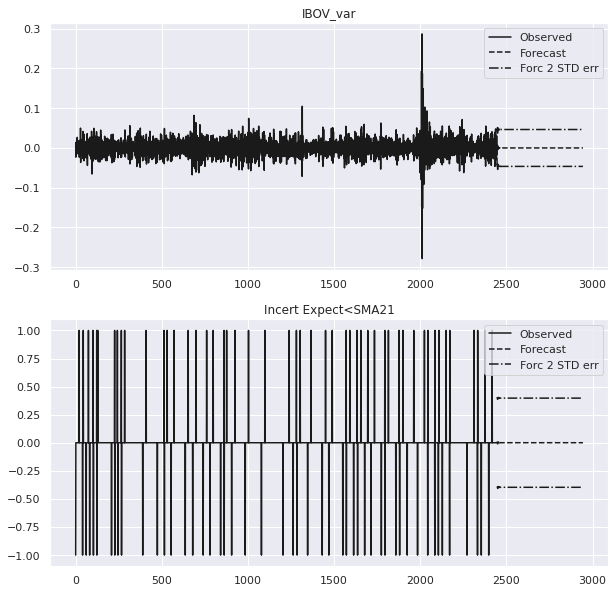

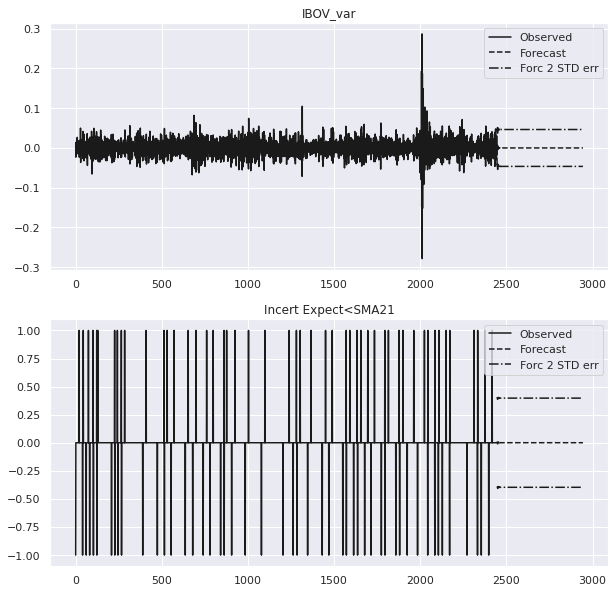

In [ ]:
# Forecast
results.plot_forecast(500)

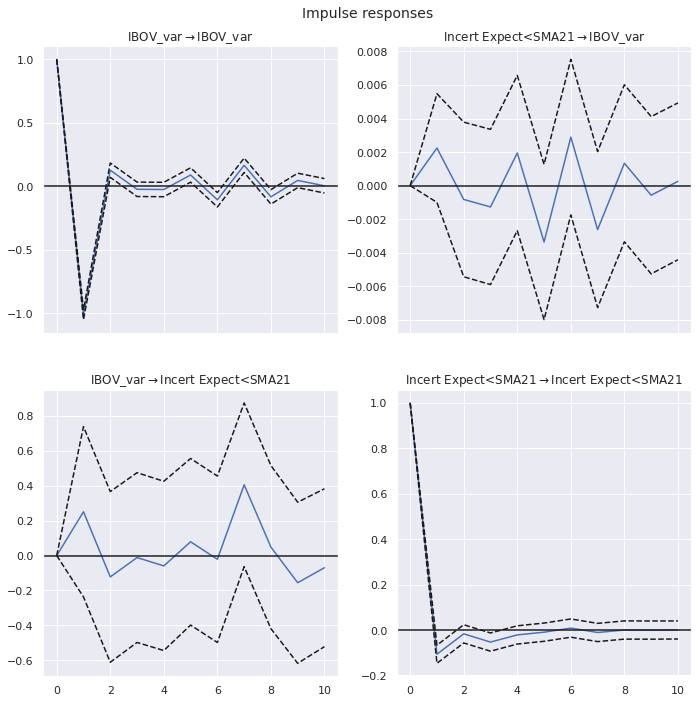

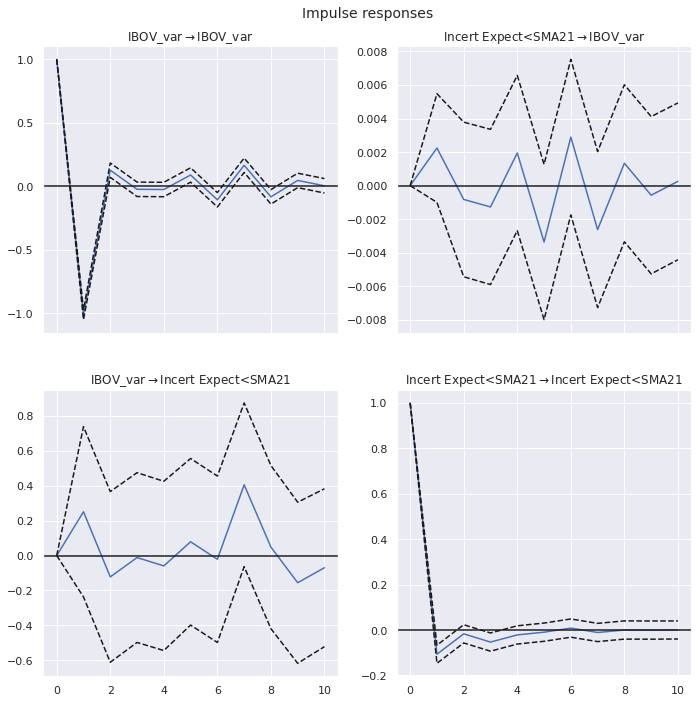

In [ ]:
 irf = results.irf(10)
 irf.plot(orth=False)

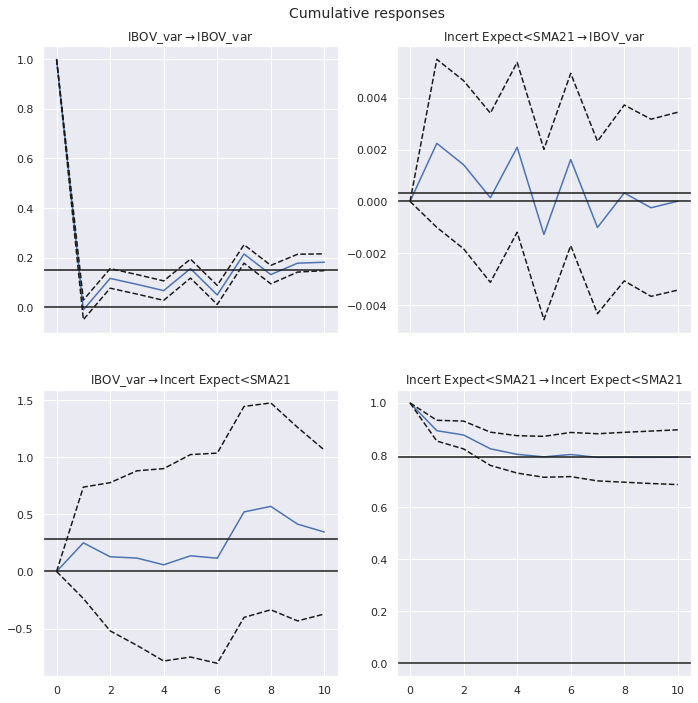

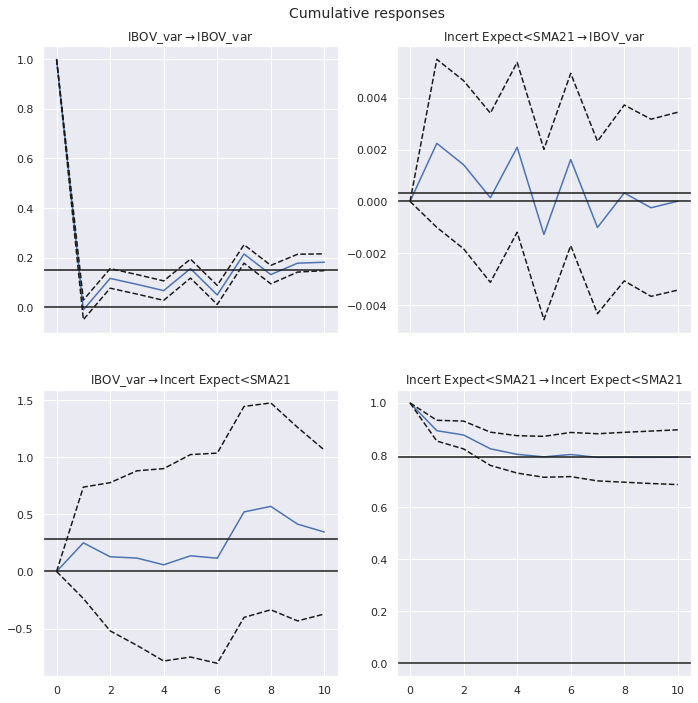

In [ ]:
irf.plot_cum_effects(orth=False)

In [ ]:
#FEVD
fevd = results.fevd(5)
fevd.summary()

FEVD for IBOV_var
     IBOV_var  Incert Expect<SMA21
0    1.000000             0.000000
1    0.999625             0.000375
2    0.999577             0.000423
3    0.999457             0.000543
4    0.999176             0.000824

FEVD for Incert Expect<SMA21
     IBOV_var  Incert Expect<SMA21
0    0.000001             0.999999
1    0.000408             0.999592
2    0.000506             0.999494
3    0.000505             0.999495
4    0.000528             0.999472




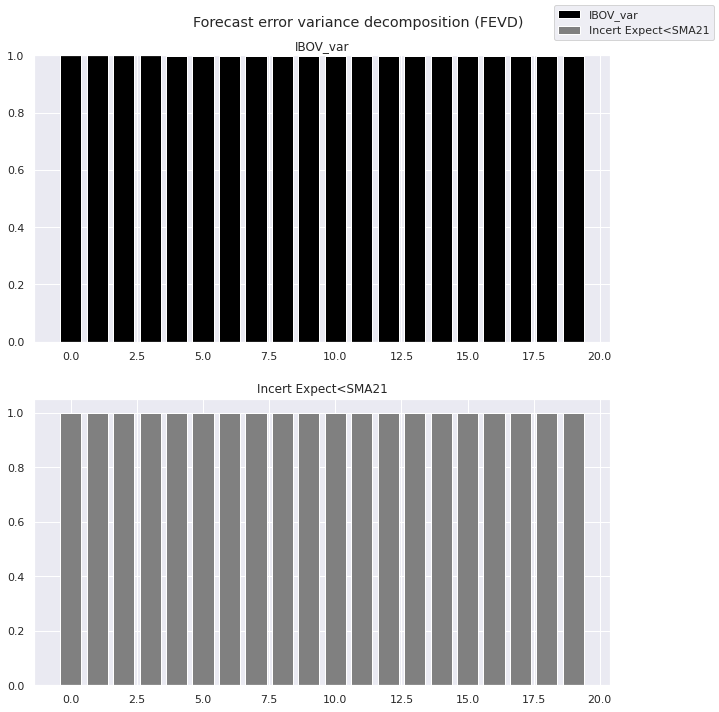

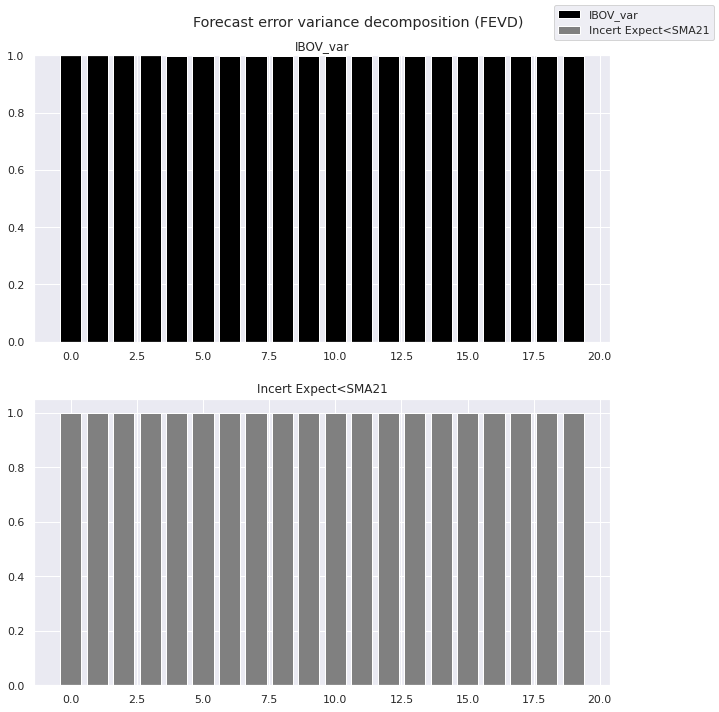

In [ ]:
results.fevd(20).plot()

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

NameError: ignored